# Analisis Exploratorio - SF Bay Area Bike Share

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import math
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('default') # Make the graphs a bit prettier
plt.rcParams['figure.figsize'] = (17, 7)

pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Clean-up

## Station.csv

In [2]:
stations = pd.read_csv('station.csv', sep=',', parse_dates=['installation_date'],
                      infer_datetime_format=True,low_memory=False)

### Types

In [3]:
stations.dtypes

id                            int64
name                         object
lat                         float64
long                        float64
dock_count                    int64
city                         object
installation_date    datetime64[ns]
dtype: object

### Null values

In [4]:
stations.isnull().any()

id                   False
name                 False
lat                  False
long                 False
dock_count           False
city                 False
installation_date    False
dtype: bool

### Size

In [5]:
stations.shape

(70, 7)

### Head

In [6]:
stations.head()

,id,name,lat,long,dock_count,city,installation_date
0,2,San Jose Diridon Caltrain Station,37.33,-121.90,27,San Jose,2013-08-06
1,3,San Jose Civic Center,37.33,-121.89,15,San Jose,2013-08-05
2,4,Santa Clara at Almaden,37.33,-121.89,11,San Jose,2013-08-06
3,5,Adobe on Almaden,37.33,-121.89,19,San Jose,2013-08-05
4,6,San Pedro Square,37.34,-121.89,15,San Jose,2013-08-07


## Weather.csv

In [7]:
weather = pd.read_csv('weather.csv', sep=',', parse_dates=['date'],
                      infer_datetime_format=True,low_memory=False)

### Types

In [8]:
weather.dtypes

date                              datetime64[ns]
max_temperature_f                        float64
mean_temperature_f                       float64
min_temperature_f                        float64
max_dew_point_f                          float64
mean_dew_point_f                         float64
min_dew_point_f                          float64
max_humidity                             float64
mean_humidity                            float64
min_humidity                             float64
max_sea_level_pressure_inches            float64
mean_sea_level_pressure_inches           float64
min_sea_level_pressure_inches            float64
max_visibility_miles                     float64
mean_visibility_miles                    float64
min_visibility_miles                     float64
max_wind_Speed_mph                       float64
mean_wind_speed_mph                      float64
max_gust_speed_mph                       float64
precipitation_inches                      object
cloud_cover         

In [9]:
weather['precipitation_inches'].unique()

array(['0', '0.23', 'T', '0.01', '0.28', '0.63', '0.29', '0.06', '0.85',
       '0.09', '0.64', '0.42', '0.35', '0.43', '0.22', '0.74', '0.03',
       '0.12', '0.16', '0.49', '0.17', '0.08', '0.04', '0.53', '0.07',
       '0.02', '0.83', '1.06', '1.71', '0.37', '0.27', '0.45', '0.78',
       '0.88', '0.66', '0.47', '0.1', '0.61', '0.14', '0.05', '0.68',
       '0.97', '0.26', '0.15', '0.87', '0.57', '0.69', '0.32', '0.21',
       '0.24', '0.52', '0.36', '0.33', '0.25', '0.11', '0.2', '1.18',
       '1.43', '3.12', '0.48', '0.19', '1.09', '0.65', '0.13', '0.91',
       '0.99', '0.18', '0.4', '1.07', nan, '0.41', '0.34', '1.25', '1.85',
       '3.36', '0.71', '1.3', '0.72', '0.6', '0.51', '1.2', '1.28', '3.23',
       '0.55', '1.26', '0.39'], dtype=object)

'T', es un dato válido, proveniente de "trace", significa que se detectó lluvia, pero no la suficiente para poder ser medida.

[Fuente 1](http://help.wunderground.com/knowledgebase/articles/656875-what-does-t-stand-for-on-the-rain-precipitation)

Aquí, [Fuente 2](http://www.experts123.com/q/what-does-the-t-mean-in-the-precipitation-column-of-the-data-listing.html) indica que la precipitación debe ser menor a 0,01 pulgadas, equivalente a 0,254 mm

In [10]:
weather[weather['precipitation_inches'] == 'T']['events'].unique()

array(['Fog', 'Rain', nan, 'Fog-Rain', 'Rain-Thunderstorm'], dtype=object)

Los eventos muestran que fueron días de lluvia, o al menos de humedad debido a la presencia de niebla.

In [11]:
weather['events'].unique()

array([nan, 'Fog', 'Rain', 'Fog-Rain', 'rain', 'Rain-Thunderstorm'], dtype=object)

In [12]:
weather['events'] = weather['events'].apply(lambda x: 'Rain' if x == 'rain' else x)

### Null values

In [13]:
weather.isnull().any()

date                              False
max_temperature_f                  True
mean_temperature_f                 True
min_temperature_f                  True
max_dew_point_f                    True
mean_dew_point_f                   True
min_dew_point_f                    True
max_humidity                       True
mean_humidity                      True
min_humidity                       True
max_sea_level_pressure_inches      True
mean_sea_level_pressure_inches     True
min_sea_level_pressure_inches      True
max_visibility_miles               True
mean_visibility_miles              True
min_visibility_miles               True
max_wind_Speed_mph                 True
mean_wind_speed_mph                True
max_gust_speed_mph                 True
precipitation_inches               True
cloud_cover                        True
events                             True
wind_dir_degrees                   True
zip_code                          False
dtype: bool

### Size

In [14]:
weather.shape

(3665, 24)

### Head

In [15]:
weather.head()

,date,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,...,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code
0,2013-08-29,74.00,68.00,61.00,61.00,58.00,56.00,93.00,75.00,57.00,...,10.00,10.00,23.00,11.00,28.00,0,4.00,NaN,286.00,94107
1,2013-08-30,78.00,69.00,60.00,61.00,58.00,56.00,90.00,70.00,50.00,...,10.00,7.00,29.00,13.00,35.00,0,2.00,NaN,291.00,94107
2,2013-08-31,71.00,64.00,57.00,57.00,56.00,54.00,93.00,75.00,57.00,...,10.00,10.00,26.00,15.00,31.00,0,4.00,NaN,284.00,94107
3,2013-09-01,74.00,66.00,58.00,60.00,56.00,53.00,87.00,68.00,49.00,...,10.00,10.00,25.00,13.00,29.00,0,4.00,NaN,284.00,94107
4,2013-09-02,75.00,69.00,62.00,61.00,60.00,58.00,93.00,77.00,61.00,...,10.00,6.00,23.00,12.00,30.00,0,6.00,NaN,277.00,94107


## Trip.csv

In [16]:
trips = pd.read_csv('trip.csv', sep=',', parse_dates=['start_date','end_date'],
                      infer_datetime_format=True,low_memory=False)

### Types

In [17]:
trips.dtypes

id                             int64
duration                       int64
start_date            datetime64[ns]
start_station_name            object
start_station_id               int64
end_date              datetime64[ns]
end_station_name              object
end_station_id                 int64
bike_id                        int64
subscription_type             object
zip_code                      object
dtype: object

In [18]:
print (trips[pd.to_numeric(trips['zip_code'], errors='coerce').isnull()]['zip_code'])

86        NaN
181       NaN
193       NaN
253       NaN
316       NaN
354       NaN
387       NaN
421       NaN
429       NaN
477       NaN
481       NaN
483       NaN
545       NaN
554       NaN
560       NaN
588       NaN
600       NaN
603       NaN
617       NaN
619       NaN
620       NaN
622       NaN
627       NaN
630       NaN
635       NaN
660       NaN
662       NaN
671       NaN
697       NaN
698       NaN
         ... 
669698    nil
669699    nil
669701    nil
669702    nil
669703    nil
669704    nil
669705    nil
669706    nil
669710    nil
669733    nil
669740    nil
669741    nil
669750    nil
669751    nil
669756    nil
669757    nil
669819    nil
669820    nil
669821    nil
669830    nil
669841    nil
669842    nil
669866    nil
669886    nil
669887    nil
669935    nil
669936    nil
669939    nil
669940    nil
669944    nil
Name: zip_code, dtype: object


In [19]:
trips.zip_code = pd.to_numeric(trips.zip_code, errors='coerce')

### Null values

In [20]:
trips.isnull().any()

id                    False
duration              False
start_date            False
start_station_name    False
start_station_id      False
end_date              False
end_station_name      False
end_station_id        False
bike_id               False
subscription_type     False
zip_code               True
dtype: bool

### Outliers

In [20]:
trips.sort_values(by='duration',ascending=False).head()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
573566,568474,17270400,2014-12-06 21:59:00,South Van Ness at Market,66,2015-06-24 20:18:00,2nd at Folsom,62,535,Customer,95531.00
382718,825850,2137000,2015-06-28 21:50:00,Market at Sansome,77,2015-07-23 15:27:00,Yerba Buena Center of the Arts (3rd @ Howard),68,466,Customer,97213.00
440339,750192,1852590,2015-05-02 06:17:00,San Antonio Shopping Center,31,2015-05-23 16:53:00,Castro Street and El Camino Real,32,680,Subscriber,94024.00
371066,841176,1133540,2015-07-10 10:35:00,University and Emerson,35,2015-07-23 13:27:00,University and Emerson,35,262,Customer,94306.00
80510,111309,722236,2013-11-30 13:29:00,University and Emerson,35,2013-12-08 22:06:00,University and Emerson,35,247,Customer,94301.00


Existen viajes que duran mas de 1 millon de segundos, casi 200 días, claramente existen outliers que deben ser removidos

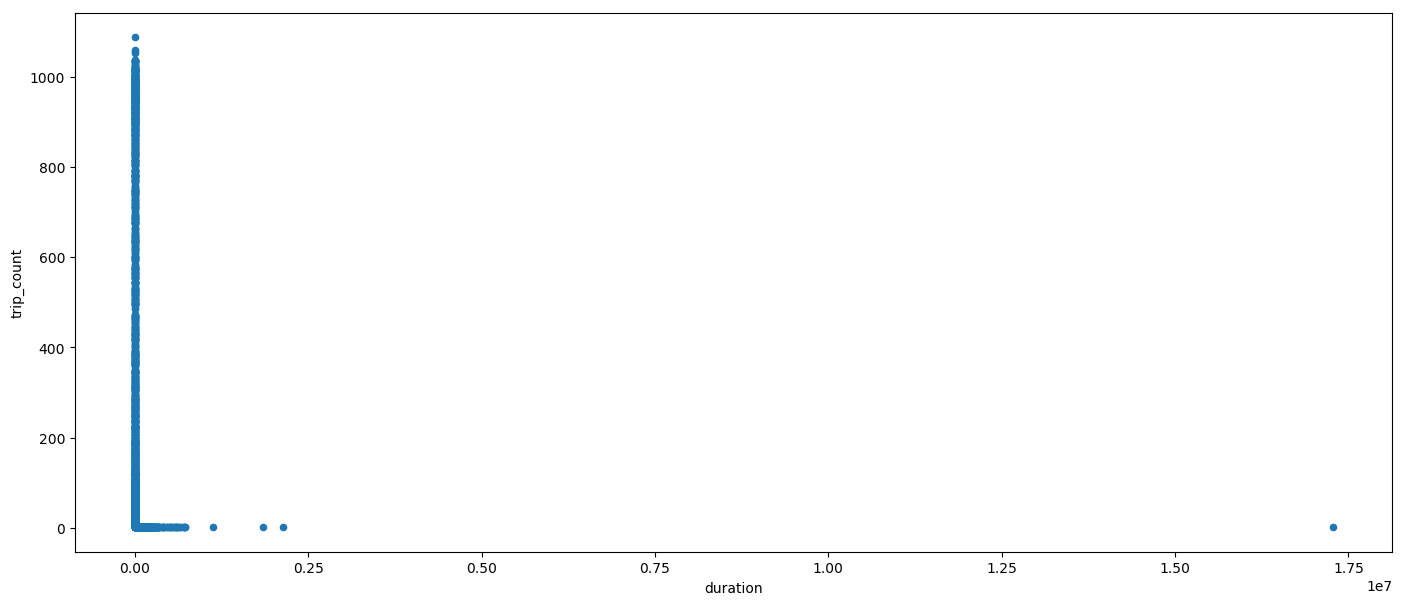

In [21]:
# realizando un scatter plot se aprecia mejor lo expresado anteriormente
duration_count = trips.loc[:,['duration','id']].groupby('duration').agg('count').reset_index()
duration_count.columns = ['duration','trip_count']
duration_count.plot.scatter('duration','trip_count');

In [22]:
trips.sort_values(by='duration').head()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
301480,218776,60,2014-03-18 17:50:00,Mechanics Plaza (Market at Battery),75,2014-03-18 17:51:00,Mechanics Plaza (Market at Battery),75,334,Subscriber,94104.00
252114,284638,60,2014-05-14 20:11:00,Market at 10th,67,2014-05-14 20:12:00,Market at 10th,67,372,Subscriber,94107.00
79739,110247,60,2013-11-28 09:52:00,2nd at Townsend,61,2013-11-28 09:53:00,2nd at Townsend,61,546,Subscriber,94107.00
618094,506025,60,2014-10-20 08:16:00,Market at Sansome,77,2014-10-20 08:17:00,Market at Sansome,77,109,Subscriber,94114.00
547555,603851,60,2015-01-14 12:37:00,Golden Gate at Polk,59,2015-01-14 12:38:00,Golden Gate at Polk,59,548,Subscriber,94109.00


Tambien existen viajes que duran 1 minuto, ademas de que la estacion de inicio y fin es la misma

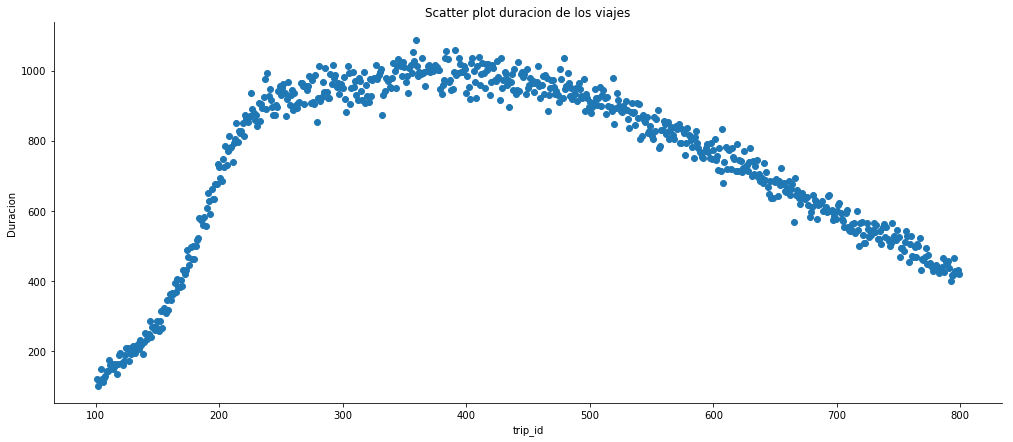

In [38]:
# la mayoria de los viajes duran entre 200 y 600 segundos
%matplotlib inline

x = duration_count.loc[ ( 100 < duration_count.duration ) & ( duration_count.duration < 800)].duration
y = duration_count.loc[ ( 100 < duration_count.duration ) & ( duration_count.duration < 800)].trip_count

fig, ax = plt.subplots(figsize=(17, 7))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title('Scatter plot duracion de los viajes')
ax.set_ylabel('Duracion')
ax.set_xlabel('trip_id')
ax.scatter(x,y)

In [39]:
same_destination = trips[trips['start_station_name'] == trips['end_station_name']]
same_destination = same_destination[same_destination['duration'] > 120]
same_destination = same_destination[same_destination['duration'] < 3600]
same_destination.sort_values(by='duration',ascending=True)

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
602677,526831,121,2014-11-03 11:46:00,Mezes Park,83,2014-11-03 11:48:00,Mezes Park,83,78,Subscriber,94063.00
595160,537618,121,2014-11-10 10:19:00,Castro Street and El Camino Real,32,2014-11-10 10:21:00,Castro Street and El Camino Real,32,654,Customer,95054.00
144921,431764,121,2014-08-30 09:40:00,Harry Bridges Plaza (Ferry Building),50,2014-08-30 09:42:00,Harry Bridges Plaza (Ferry Building),50,567,Subscriber,94133.00
241424,299073,121,2014-05-27 08:50:00,San Francisco Caltrain 2 (330 Townsend),69,2014-05-27 08:52:00,San Francisco Caltrain 2 (330 Townsend),69,541,Subscriber,94041.00
415315,783574,121,2015-05-27 20:56:00,Clay at Battery,41,2015-05-27 20:58:00,Clay at Battery,41,478,Customer,95648.00
15768,25798,121,2013-09-18 10:47:00,Beale at Market,56,2013-09-18 10:49:00,Beale at Market,56,530,Subscriber,94111.00
182398,379667,121,2014-07-25 08:47:00,Washington at Kearny,46,2014-07-25 08:49:00,Washington at Kearny,46,347,Customer,63104.00
46628,66415,121,2013-10-21 11:32:00,Temporary Transbay Terminal (Howard at Beale),55,2013-10-21 11:34:00,Temporary Transbay Terminal (Howard at Beale),55,633,Customer,nan
329515,895603,121,2015-08-18 18:42:00,Market at 4th,76,2015-08-18 18:44:00,Market at 4th,76,363,Subscriber,94702.00
94069,130417,121,2013-12-18 22:54:00,University and Emerson,35,2013-12-18 22:56:00,University and Emerson,35,121,Subscriber,94133.00


In [40]:
viajes_sin_destino = trips[trips['start_station_name'] == trips['end_station_name']].shape[0]

print (str(viajes_sin_destino) + " \"viajes\"")

23981 "viajes"


In [41]:
# Describe de la duracion de los viajes con outliers

trips.duration.describe()

count     669959.00
mean        1107.95
std        22255.44
min           60.00
25%          344.00
50%          517.00
75%          755.00
max     17270400.00
Name: duration, dtype: float64

In [42]:
# Limpiando datos, consideramos un tiempo de viaje posible máximo en 12 horas, equivalente a 43200 segundos.
clean_trips = trips
clean_trips = clean_trips[clean_trips['duration'] <= 43200 ]
clean_trips = clean_trips[clean_trips['duration'] > 120 ]

trips = clean_trips

clean_trips.duration.describe()

count   663269.00
mean       907.10
std       2176.70
min        121.00
25%        348.00
50%        519.00
75%        756.00
max      43131.00
Name: duration, dtype: float64

In [43]:
clean_trips.to_csv(path_or_buf='trips_clean.csv',sep=',',index_label=False)

Todavía existen viajes "largos". Realizando un histograma para observar como se distribuyen las duraciones

In [44]:
clean_trips.sort_values(by='duration', ascending=False).head()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
517847,644077,43131,2015-02-13 23:39:00,Powell at Post (Union Square),71,2015-02-14 11:38:00,Market at 4th,76,328,Customer,94109.00
241729,298659,43069,2014-05-26 19:59:00,Commercial at Montgomery,45,2014-05-27 07:57:00,Embarcadero at Vallejo,48,271,Subscriber,94105.00
4677,11178,43054,2013-09-05 04:06:00,Civic Center BART (7th at Market),72,2013-09-05 16:03:00,Civic Center BART (7th at Market),72,416,Customer,nan
438495,752708,43053,2015-05-04 18:53:00,San Francisco Caltrain (Townsend at 4th),70,2015-05-05 06:50:00,Post at Kearny,47,454,Customer,94123.00
53111,75033,43038,2013-10-28 19:37:00,Powell Street BART,39,2013-10-29 07:34:00,Yerba Buena Center of the Arts (3rd @ Howard),68,309,Subscriber,94133.00


In [45]:
trips[trips['duration'] < 3600].shape[0]

643203

In [46]:
trips.shape

(663269, 11)

Sin embargo, la gran mayoria de los viajes duran menos de 1 hora que es razonable

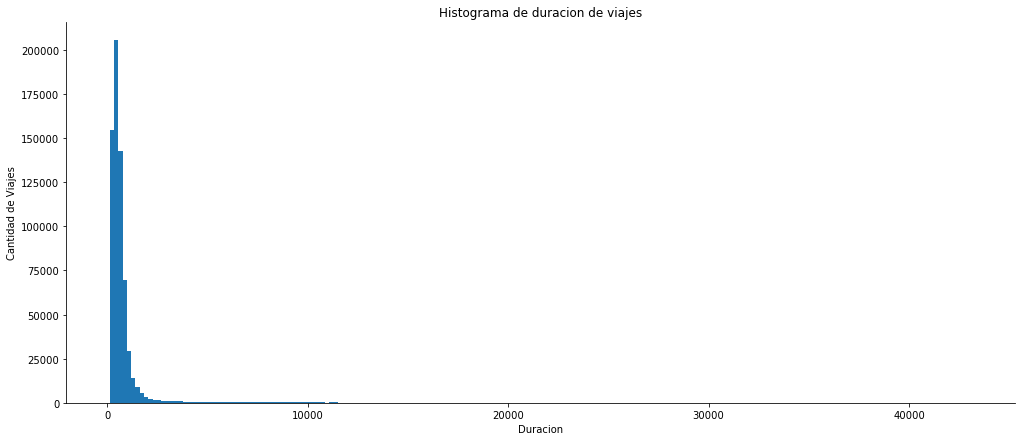

In [47]:
fig, ax = plt.subplots(figsize=(17, 7))
    
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.hist(clean_trips['duration'], bins=200)
plt.xlabel("Duracion")
plt.ylabel("Cantidad de Viajes")
plt.title("Histograma de duracion de viajes")
plt.show()

Aún habiendo filtrado los viajes menores a 12 horas, seguimos observando una gran cola en el histograma, la gran mayoría duran menos.

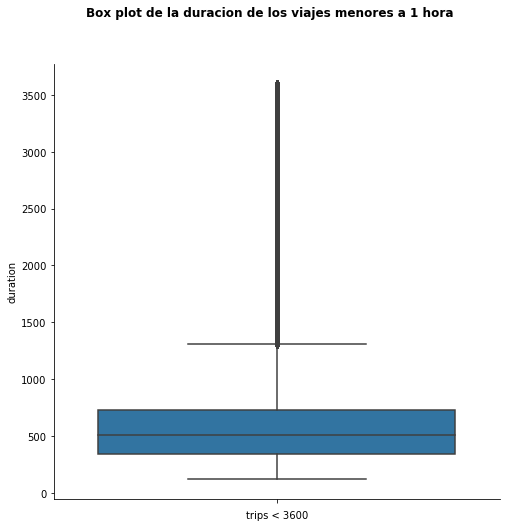

In [48]:
%matplotlib inline

fig, ax = plt.subplots(figsize=(8, 8))
    
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.suptitle('Box plot de la duracion de los viajes menores a 1 hora', fontweight='bold')
plt.xlabel("trips < 3600")
sns.boxplot(x=trips.loc[trips.duration < 3600].duration, orient='v');

### Size

In [49]:
trips.shape

(663269, 11)

### Sample

In [50]:
trips.head()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
10,4549,125,2013-08-29 13:52:00,Spear at Folsom,49,2013-08-29 13:55:00,Embarcadero at Bryant,54,368,Subscriber,94109.00
11,4498,126,2013-08-29 13:23:00,San Pedro Square,6,2013-08-29 13:25:00,Santa Clara at Almaden,4,26,Subscriber,95112.00
12,4965,129,2013-08-29 19:32:00,Mountain View Caltrain Station,28,2013-08-29 19:35:00,Mountain View Caltrain Station,28,140,Subscriber,94041.00
13,4557,130,2013-08-29 13:57:00,2nd at South Park,64,2013-08-29 13:59:00,2nd at South Park,64,371,Subscriber,94122.00
14,4386,134,2013-08-29 12:31:00,Clay at Battery,41,2013-08-29 12:33:00,Beale at Market,56,503,Subscriber,94109.00


## Status.csv

In [37]:
iter_status = pd.read_csv('status.csv', iterator = True, chunksize = 100000)

### Types

In [38]:
iter_status.get_chunk(1).dtypes

station_id          int64
bikes_available     int64
docks_available     int64
time               object
dtype: object

# Analisis

## Cual es la estacion de donde salen mas viajes?

In [51]:
trips['start_station_name'].value_counts()[:5]

San Francisco Caltrain (Townsend at 4th)         48929
San Francisco Caltrain 2 (330 Townsend)          33646
Harry Bridges Plaza (Ferry Building)             32799
Embarcadero at Sansome                           27595
Temporary Transbay Terminal (Howard at Beale)    25919
Name: start_station_name, dtype: int64

## Top 20 recorridos

In [52]:
routes_count = trips.loc[:,['id','start_station_name','end_station_name']]\
        .groupby(['start_station_name','end_station_name']).agg(['count','mean','std'])
routes_count.columns = ['trips_count','mean_duration','duration_std']
routes_count = routes_count.reset_index().sort_values('trips_count', ascending=False)[:20]
routes_count

,start_station_name,end_station_name,trips_count,mean_duration,duration_std
1383,San Francisco Caltrain 2 (330 Townsend),Townsend at 7th,6213,492161.64,252084.42
707,Harry Bridges Plaza (Ferry Building),Embarcadero at Sansome,6162,463920.64,271372.49
1765,Townsend at 7th,San Francisco Caltrain (Townsend at 4th),5041,385349.48,215410.99
90,2nd at Townsend,Harry Bridges Plaza (Ferry Building),4838,504193.78,254558.84
697,Harry Bridges Plaza (Ferry Building),2nd at Townsend,4357,500327.68,254931.13
559,Embarcadero at Sansome,Steuart at Market,4269,491151.54,271534.40
517,Embarcadero at Folsom,San Francisco Caltrain (Townsend at 4th),3963,509522.72,257491.93
1667,Steuart at Market,2nd at Townsend,3902,503580.52,261655.63
57,2nd at South Park,Market at Sansome,3627,438353.57,252848.94
1327,San Francisco Caltrain (Townsend at 4th),Harry Bridges Plaza (Ferry Building),3620,473036.30,259429.68


## ¿Qué tipos de subscripciones existen?

In [53]:
trips.subscription_type.unique()

array(['Subscriber', 'Customer'], dtype=object)

### ¿Cuántos viajes realizaron?

In [54]:
subscribers_trip_count = pd.DataFrame(trips.groupby('subscription_type')['id'].agg('count'))
subscribers_trip_count.columns = ['travel_count']
subscribers_trip_count

,travel_count
subscription_type,
Customer,101817
Subscriber,561452


## ¿Cómo varia la cantidad de viajes segun el dia de la semana?

In [55]:
trips.isnull().any()

id                    False
duration              False
start_date            False
start_station_name    False
start_station_id      False
end_date              False
end_station_name      False
end_station_id        False
bike_id               False
subscription_type     False
zip_code               True
dtype: bool

In [56]:
# para responder la pregunta se realizara un plot el cual requiere una columna "day_of_week"
trips['day_of_week'] = trips['start_date'].dt.dayofweek

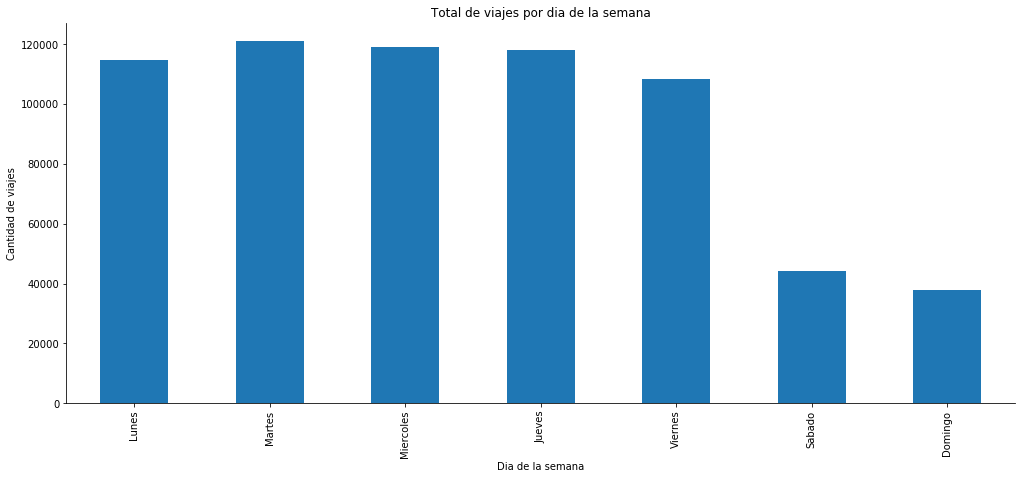

In [57]:
trips_by_day_count = trips['day_of_week'].value_counts().sort_index()
trips_by_day_count.index = ['Lunes','Martes','Miercoles','Jueves','Viernes','Sabado','Domingo']

fig, ax = plt.subplots(figsize=(17, 7))
    
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.title('Total de viajes por dia de la semana')
plt.xlabel('Dia de la semana')
plt.ylabel('Cantidad de viajes')

trips_by_day_count.plot('bar');

## ¿Los "Customers" tienden a estar mas los fines de semana?

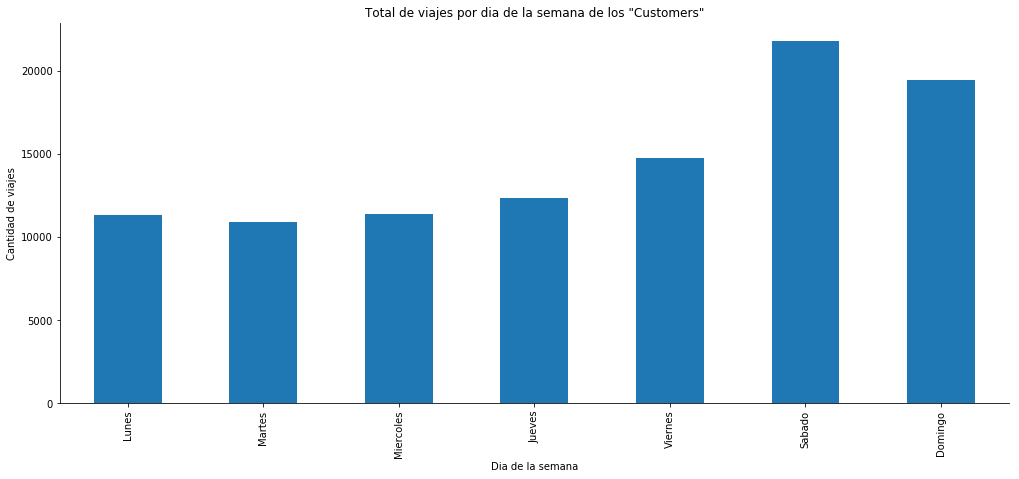

In [58]:
customers_trips_by_day = trips.loc[trips['subscription_type'] == 'Customer',['day_of_week']]['day_of_week'].value_counts().sort_index()
customers_trips_by_day.index = ['Lunes','Martes','Miercoles','Jueves','Viernes','Sabado','Domingo']

fig, ax = plt.subplots(figsize=(17, 7))
    
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.title('Total de viajes por dia de la semana de los "Customers"')
plt.xlabel('Dia de la semana')
plt.ylabel('Cantidad de viajes')

customers_trips_by_day.plot('bar');

## En promedio, ¿la duracion de los viajes en la semana es constante? ¿Las personas van al trabajo/colegio en bicicleta?

In [59]:
def getNames(seriesOfNumbers):
    names = []
    days = ['Lunes','Martes','Miercoles','Jueves','Viernes','Sabado','Domingo']
    
    for numDay in seriesOfNumbers:
        names.append(days[numDay])
    return names

In [68]:
tripsByDayAndDuration = trips.loc[:,['day_of_week','duration']].sort_values('day_of_week')
tripsByDayAndDuration = tripsByDayAndDuration.groupby('day_of_week').mean().reset_index()
tripsByDayAndDuration['day_of_week'] = tripsByDayAndDuration[['day_of_week']].apply(lambda dates: getNames(dates))

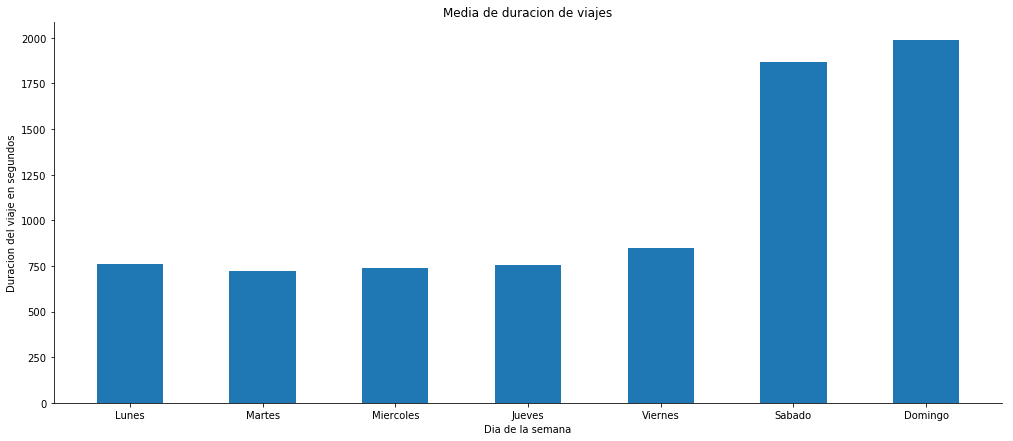

In [113]:
fig, ax = plt.subplots(figsize=(17, 7))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

trip_duration_values = tuple(tripsByDayAndDuration.duration)
ind = np.arange(len(tripsByDayAndDuration.day_of_week))
width = 0.5

plt.bar(ind, trip_duration_values, width)
plt.title('Media de duracion de viajes')
plt.xlabel('Dia de la semana')
plt.ylabel('Duracion del viaje en segundos')
plt.xticks(ind, tuple(tripsByDayAndDuration.day_of_week))

plt.show()

## Mean Duration Customers vs. Mean Duration Subscribers

In [142]:
duration_trip_by_subscription = pd.DataFrame({'mean_duration': trips.groupby(['subscription_type'])['duration'].mean(),\
                                'std_duration': trips.groupby(['subscription_type'])['duration'].std()})

duration_trip_by_subscription

,mean_duration,std_duration
subscription_type,,
Customer,2829.58,4762.62
Subscriber,558.47,831.93


## Media de duracion de viajes de los 'Subscribers'

In [96]:
subscriptors_trips = trips.loc[trips.subscription_type == 'Subscriber',['day_of_week','duration']]
subscriptors_trips = subscriptors_trips.groupby('day_of_week').mean().reset_index()
subscriptors_trips['day_of_week'] = subscriptors_trips[['day_of_week']].apply(lambda dates: getNames(dates))

In [97]:
subscriptors_trips

,day_of_week,duration
0,Lunes,550.32
1,Martes,552.25
2,Miercoles,555.71
3,Jueves,549.42
4,Viernes,560.15
5,Sabado,620.08
6,Domingo,625.96


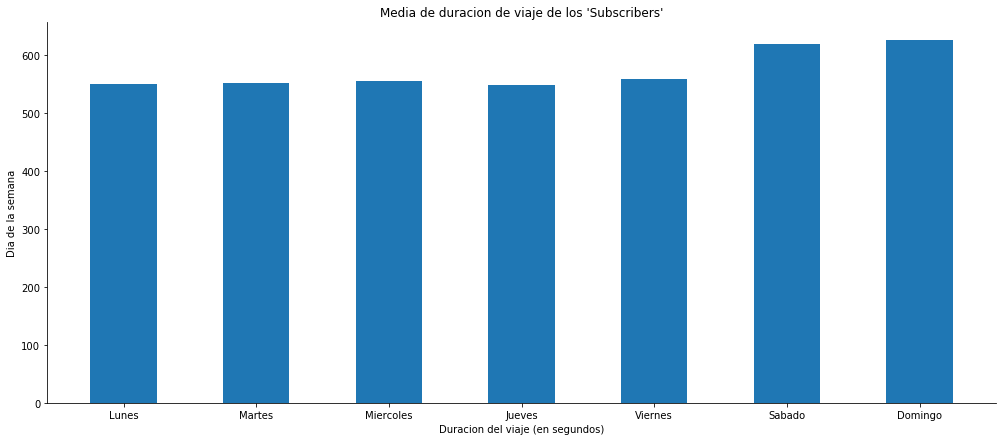

In [112]:
fig, ax = plt.subplots(figsize=(17, 7))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title('Media de duracion de viaje de los \'Subscribers\'')
ax.set_ylabel('Dia de la semana')
ax.set_xlabel('Duracion del viaje (en segundos)')

trip_duration_values = tuple(subscriptors_trips.duration)
ind = np.arange(len(subscriptors_trips.day_of_week))
width = 0.5

plt.bar(ind, trip_duration_values, width)

plt.xticks(ind, tuple(subscriptors_trips.day_of_week))

plt.show()

## Media de duracion de los 'costumers'

In [114]:
customers_trips = trips.loc[trips.subscription_type == 'Customer',['day_of_week','duration']]
customers_trips = customers_trips.groupby('day_of_week').mean().reset_index()
customers_trips['day_of_week'] = customers_trips[['day_of_week']].apply(lambda dates: getNames(dates))

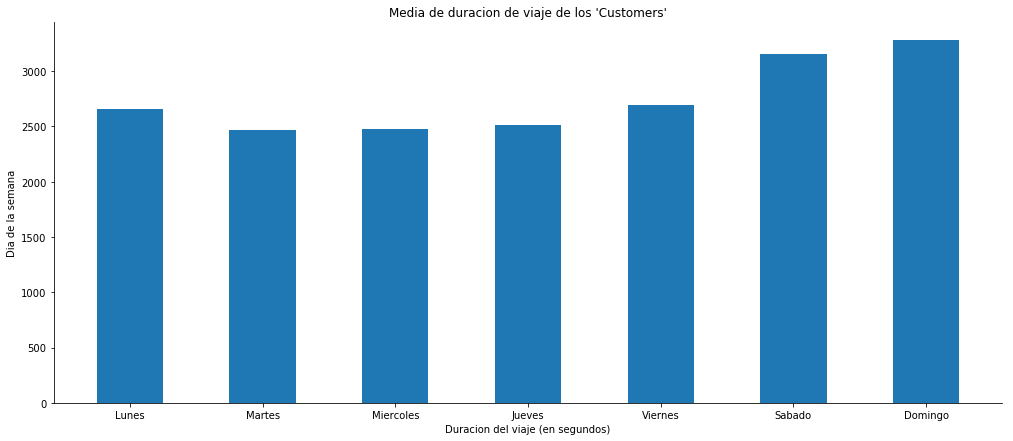

In [115]:
fig, ax = plt.subplots(figsize=(17, 7))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title('Media de duracion de viaje de los \'Customers\'')
ax.set_ylabel('Dia de la semana')
ax.set_xlabel('Duracion del viaje (en segundos)')

trip_duration_values = tuple(customers_trips.duration)
ind = np.arange(len(customers_trips.day_of_week))
width = 0.5

plt.bar(ind, trip_duration_values, width)

plt.xticks(ind, tuple(subscriptors_trips.day_of_week))

plt.show()

## Como es la variabilidad de la duracion de los viajes en la semana?

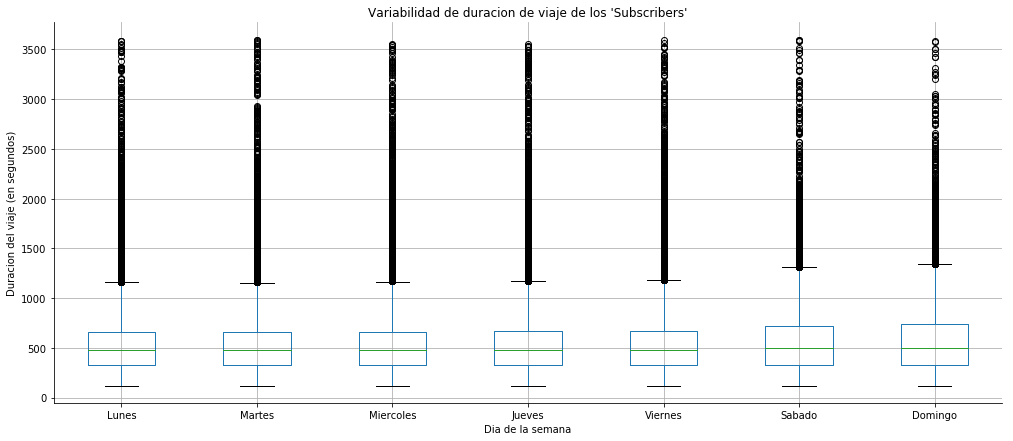

In [116]:
# Variabilidad de los 'Subscribers'
trips_by_day = trips.loc[(trips.duration < 3600) & (trips.subscription_type == 'Subscriber'),['duration','day_of_week','id']]\
            .pivot_table(index='id', columns='day_of_week')
days = ['Lunes','Martes','Miercoles','Jueves','Viernes','Sabado','Domingo']

fig, ax = plt.subplots(figsize=(17, 7))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax = trips_by_day.boxplot();
ax.set_xticklabels(days);
plt.title('Variabilidad de duracion de viaje de los \'Subscribers\'')
plt.xlabel('Dia de la semana')
plt.ylabel('Duracion del viaje (en segundos)');

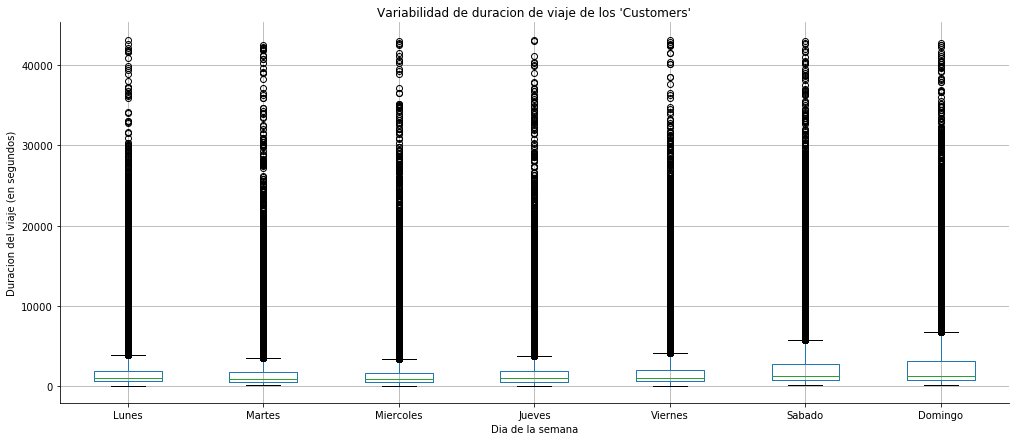

In [117]:
# Variabilidad de los 'customers'
trips_by_day = trips.loc[trips.subscription_type == 'Customer',['duration','day_of_week','id']]\
            .pivot_table(index='id', columns='day_of_week')
days = ['Lunes','Martes','Miercoles','Jueves','Viernes','Sabado','Domingo']

fig, ax = plt.subplots(figsize=(17, 7))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax = trips_by_day.boxplot();
ax.set_xticklabels(days);
plt.title('Variabilidad de duracion de viaje de los \'Customers\'')
plt.xlabel('Dia de la semana')
plt.ylabel('Duracion del viaje (en segundos)');

## Como varían los viajes en función de la hora?

In [118]:
trips_with_hour = trips.loc[:, ['start_date','duration','id']]
trips_with_hour['start_time'] = trips_with_hour.start_date.dt.time
trips_with_hour['start_date'] = trips_with_hour.start_date.dt.date
trips_with_hour['start_hour'] = trips_with_hour.start_time.apply(lambda x: x.hour)

In [131]:
trips_by_hour = trips_with_hour.loc[:, ['start_hour','id']].groupby('start_hour').count()
trips_by_hour.columns = ['trips_count']
# trips_by_hour.plot(kind='bar',rot=0);

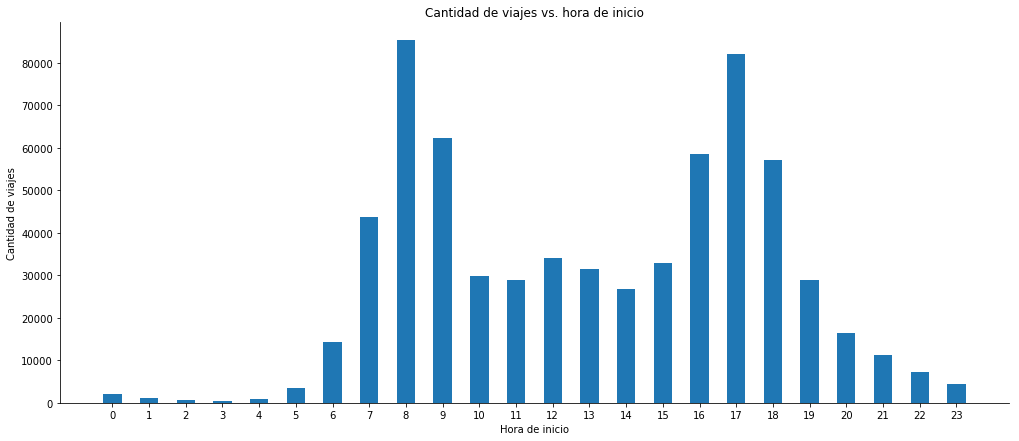

In [133]:
fig, ax = plt.subplots(figsize=(17, 7))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title('Cantidad de viajes vs. hora de inicio')
ax.set_xlabel('Hora de inicio')
ax.set_ylabel('Cantidad de viajes')

trip_count_values = tuple(trips_by_hour.trips_count)
ind = np.arange(len(trips_by_hour.index))
width = 0.5

plt.bar(ind, trip_count_values, width)

plt.xticks(ind, tuple(trips_by_hour.index))

plt.show()

## Como varía la duracion promedio de los viajes en función de la hora?

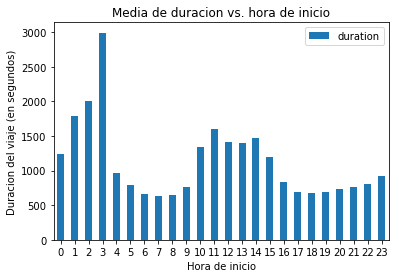

In [129]:
duration_by_hour = trips_with_hour.loc[:,['start_hour','duration']].groupby('start_hour').mean()
duration_by_hour.plot(kind='bar',rot=0);
plt.title('Media de duracion vs. hora de inicio')
plt.xlabel('Hora de inicio')
plt.ylabel('Duracion del viaje (en segundos)');

## Que sucede a las 3 am?

In [137]:
trips_with_hour.loc[trips_with_hour['start_hour'] == 3].describe()

,duration,id,start_hour
count,326.00,326.00,326.00
mean,2993.75,402388.06,3.00
std,7210.22,282208.99,0.00
min,146.00,5115.00,3.00
25%,502.25,142496.00,3.00
50%,951.50,408049.50,3.00
75%,1582.00,635261.75,3.00
max,42869.00,911618.00,3.00


## Como varia la duracion promedio de los viajes en funcion del mes?

In [222]:
trips['month'] = trips.start_date.apply(lambda x: x.month)

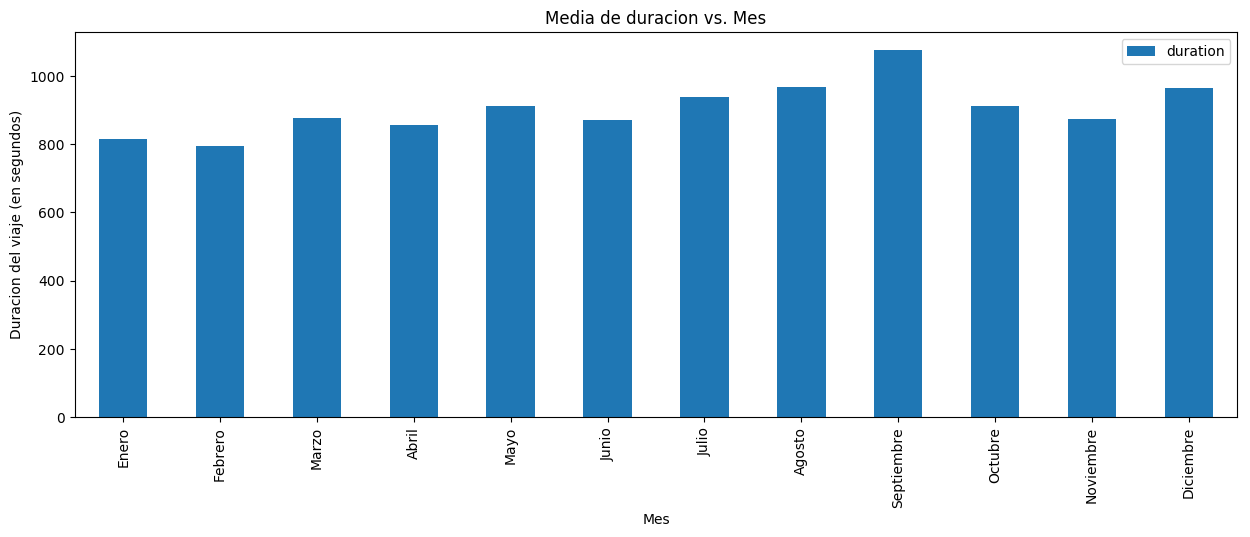

In [223]:
trips_by_month = trips.loc[:,['month','duration']].groupby('month').mean()
trips_by_month.index = ['Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosto','Septiembre','Octubre','Noviembre','Diciembre']
trips_by_month.plot(kind='bar');
plt.title('Media de duracion vs. Mes')
plt.xlabel('Mes')
plt.ylabel('Duracion del viaje (en segundos)');

## Como varia la cantidad de viajes entre estaciones?

In [139]:
stations.rename(columns={'name': 'start_station_name'}, inplace=True)
geo_station_trips = pd.merge(trips,stations, on = ['start_station_name'], how = 'outer') 
geo_station_trips = geo_station_trips[['start_station_name','end_station_name','lat','long']]

In [140]:
# Se agrega una columna para contar la cantidad de viajes a cada estación, partiendo de una estación determinada
geo_station_trips['cant'] = 1

In [142]:
trips_btw_stations = geo_station_trips.groupby(['lat','long','start_station_name', 'end_station_name'])\
                    [['cant']].sum().reset_index()
trips_btw_stations.head()

,lat,long,start_station_name,end_station_name,cant
0,37.33,-121.90,San Jose Diridon Caltrain Station,Adobe on Almaden,626
1,37.33,-121.90,San Jose Diridon Caltrain Station,Arena Green / SAP Center,35
2,37.33,-121.90,San Jose Diridon Caltrain Station,Japantown,632
3,37.33,-121.90,San Jose Diridon Caltrain Station,MLK Library,808
4,37.33,-121.90,San Jose Diridon Caltrain Station,Mountain View Caltrain Station,2


In [143]:
# Para tener una mejor idea de la geografia del lugar, se ordenan las estaciones de Norte a Sur y de Oeste a Este
stations = stations.sort_values(by = ['lat','long'],ascending=[False, True]).reset_index()

In [124]:
# Se crea una Matriz que contenga como indice y columnas los nombres de cada estación,
# para luego rellenar con los datos previamente obtenidos de la cantidad de viajes entre estaciones
columns = stations[['start_station_name']]
matrix = pd.DataFrame(index =columns, columns = columns)
matrix = matrix.fillna(0)

In [130]:
# Se cargan los datos a la matriz
maxTripPos =  trips_btw_stations['cant'].argmax()
minTripPos =  trips_btw_stations['cant'].argmin()
for x in range(0, trips_btw_stations.shape[0]):
        #Start Station
        pos_x = stations[stations['start_station_name'] == trips_btw_stations.iloc[x,2]].index.tolist()
        #End Station
        pos_y =  stations[stations['start_station_name'] == trips_btw_stations.iloc[x,3]].index.tolist()
        # Es posible normalizar usando el valor comentado 
#         val = (trips_btw_stations.iloc[x,4] - trips_btw_stations['cant'].mean())\
#         / (trips_btw_stations.iloc[maxTripPos,4] - trips_btw_stations.iloc[minTripPos,4])
        val = trips_btw_stations.iloc[x,4]
        matrix.iloc[pos_x,pos_y] = val
        if (val <= 0) : matrix.iloc[pos_x,pos_y] = 0

In [135]:
plt.rcParams['ytick.labelsize']

'medium'

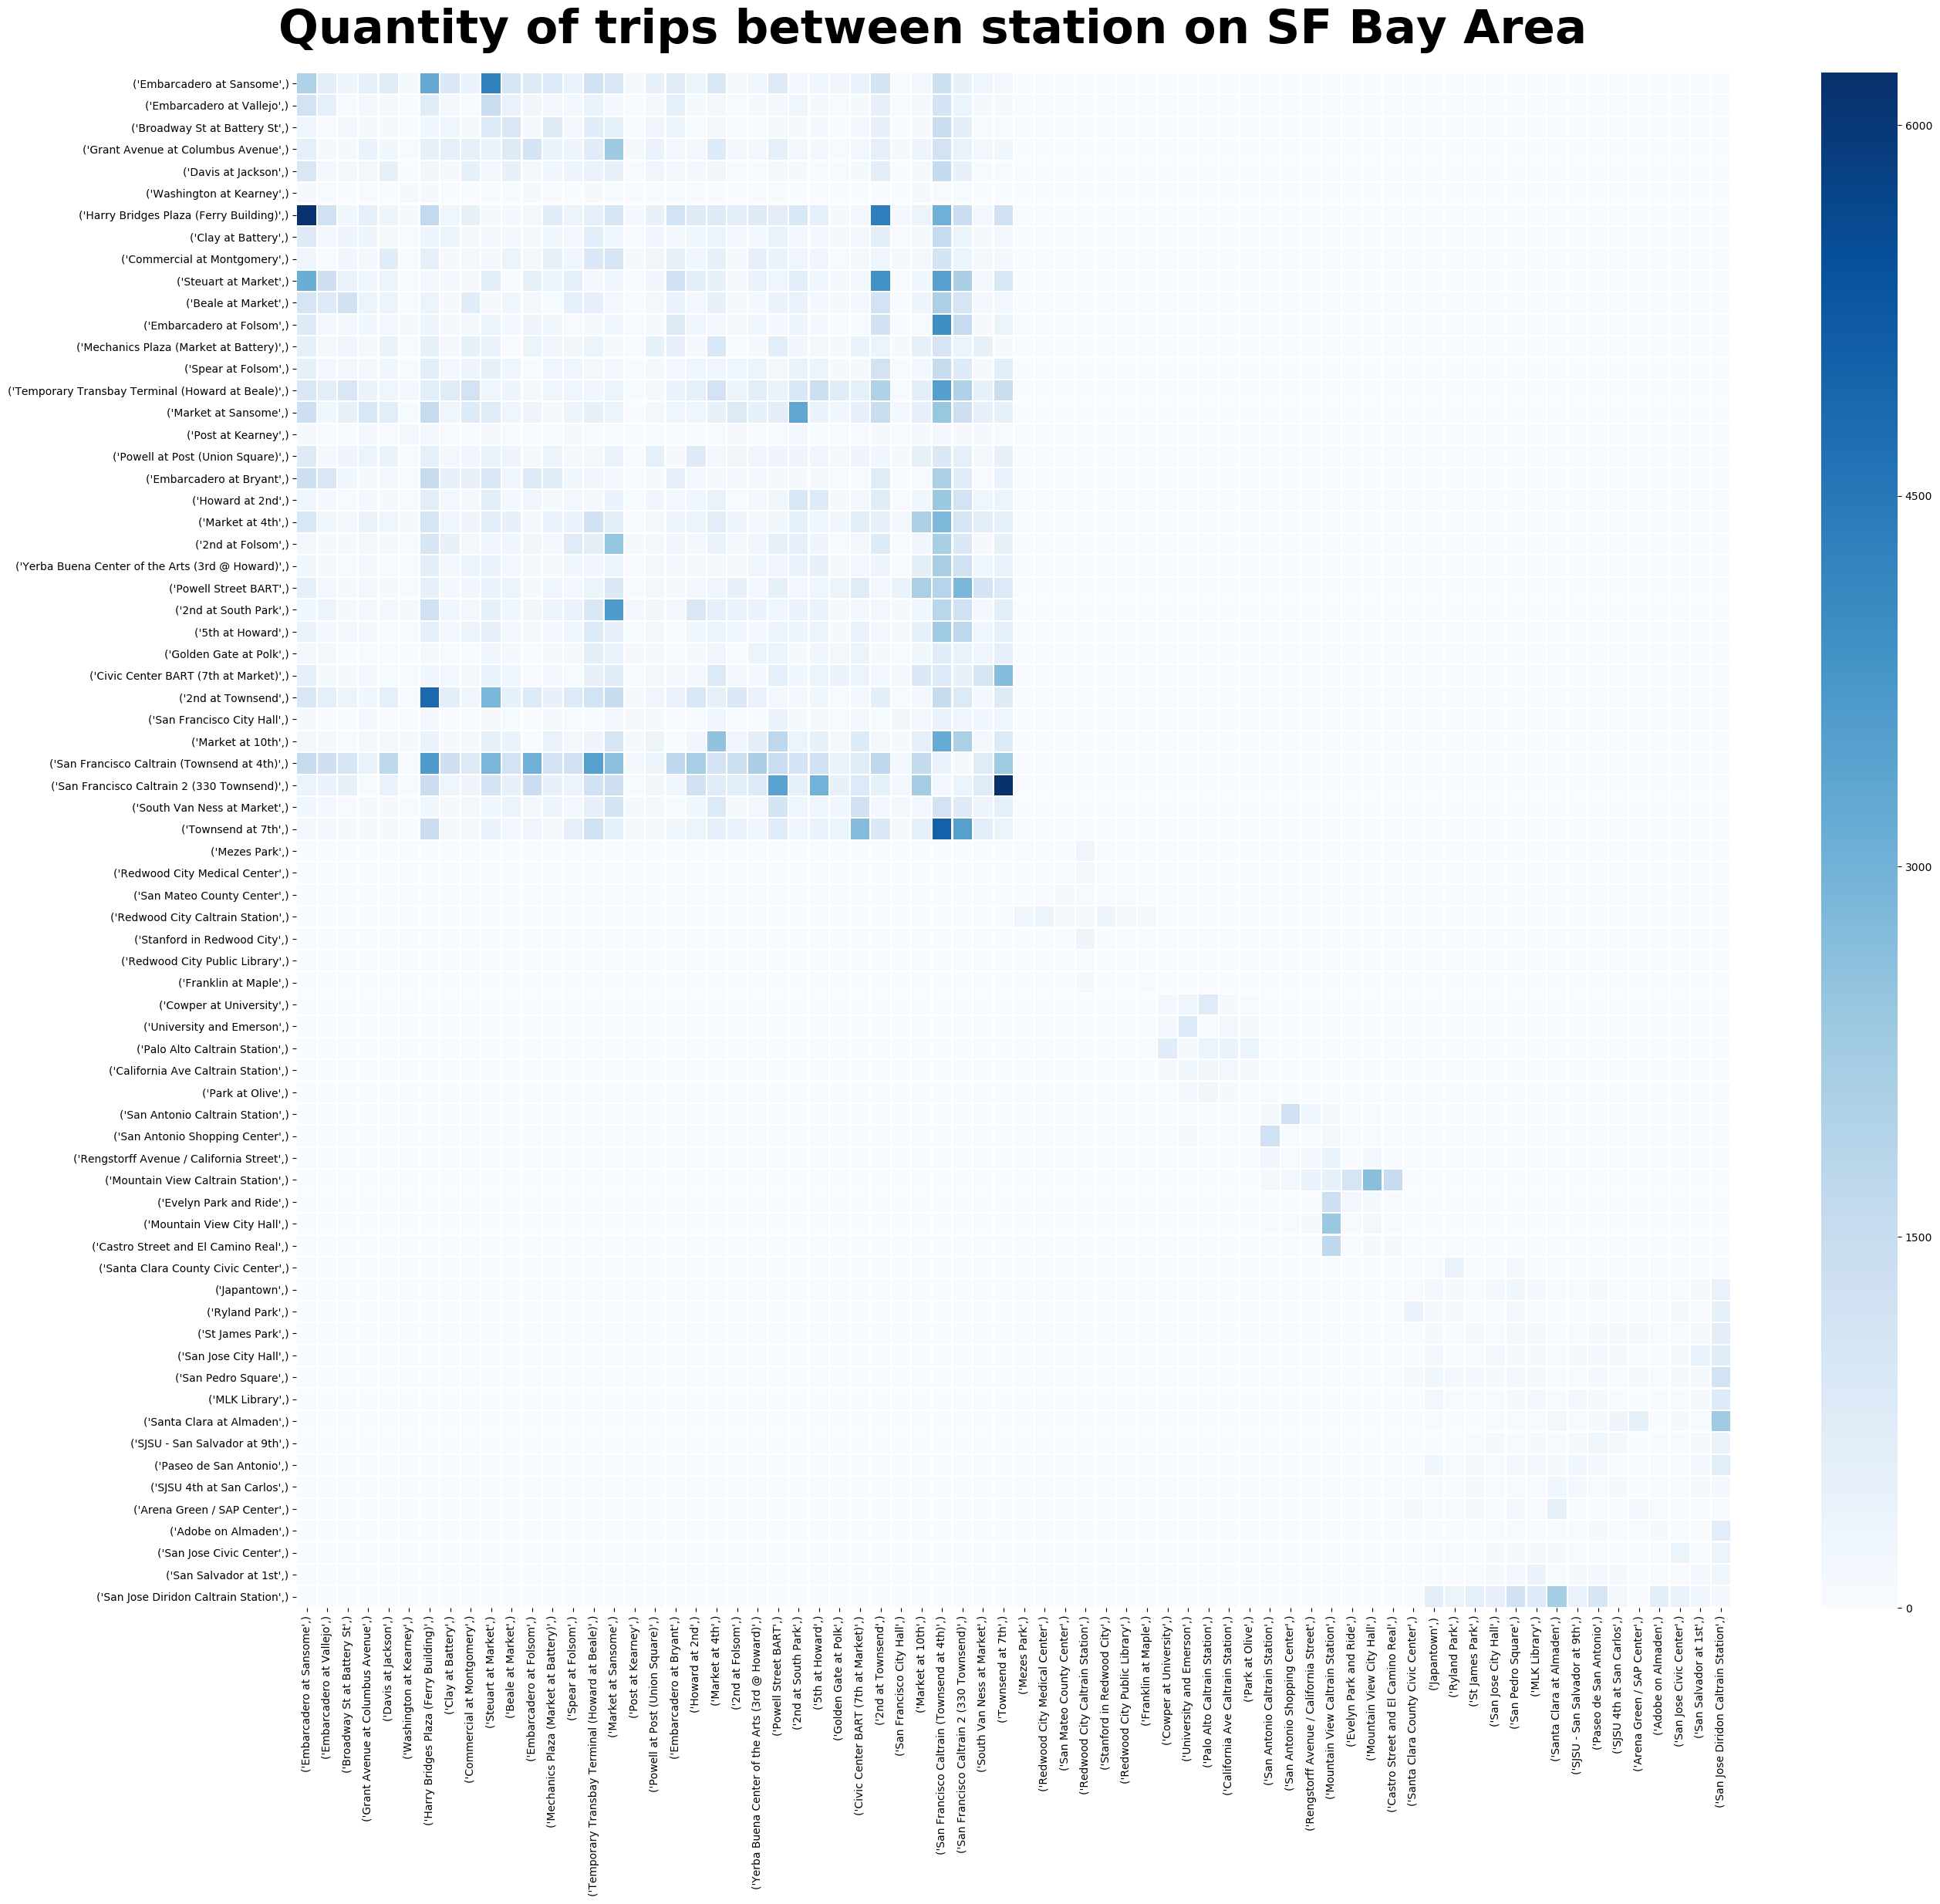

In [136]:
# get the tick label font size
fontsize_pt = 10 #plt.rcParams['ytick.labelsize']
dpi = 72.27

# comput the matrix height in points and inches
matrix_height_pt = fontsize_pt * 70
matrix_height_in = matrix_height_pt / dpi

# compute the required figure height 
top_margin = 0.04  # in percentage of the figure height
bottom_margin = 0.04 # in percentage of the figure height
figure_height = matrix_height_in / (1 - top_margin - bottom_margin)


# build the figure instance with the desired height
fig, ax = plt.subplots(
        figsize=(30,figure_height), 
        gridspec_kw=dict(top=2,wspace = 12))

fig.suptitle('Quantity of trips between station on SF Bay Area', fontsize=44, fontweight='bold',x= 0.4,y=2.08)

# let seaborn do it's thing
ax = sns.heatmap(matrix,cmap='Blues', linewidths=.8, ax=ax)

Como la diferencia de viajes entre estaciones es muy amplia, se robustece los valores para lograr un mejor entendimiento visual sobre entre que estaciones se viaja mas

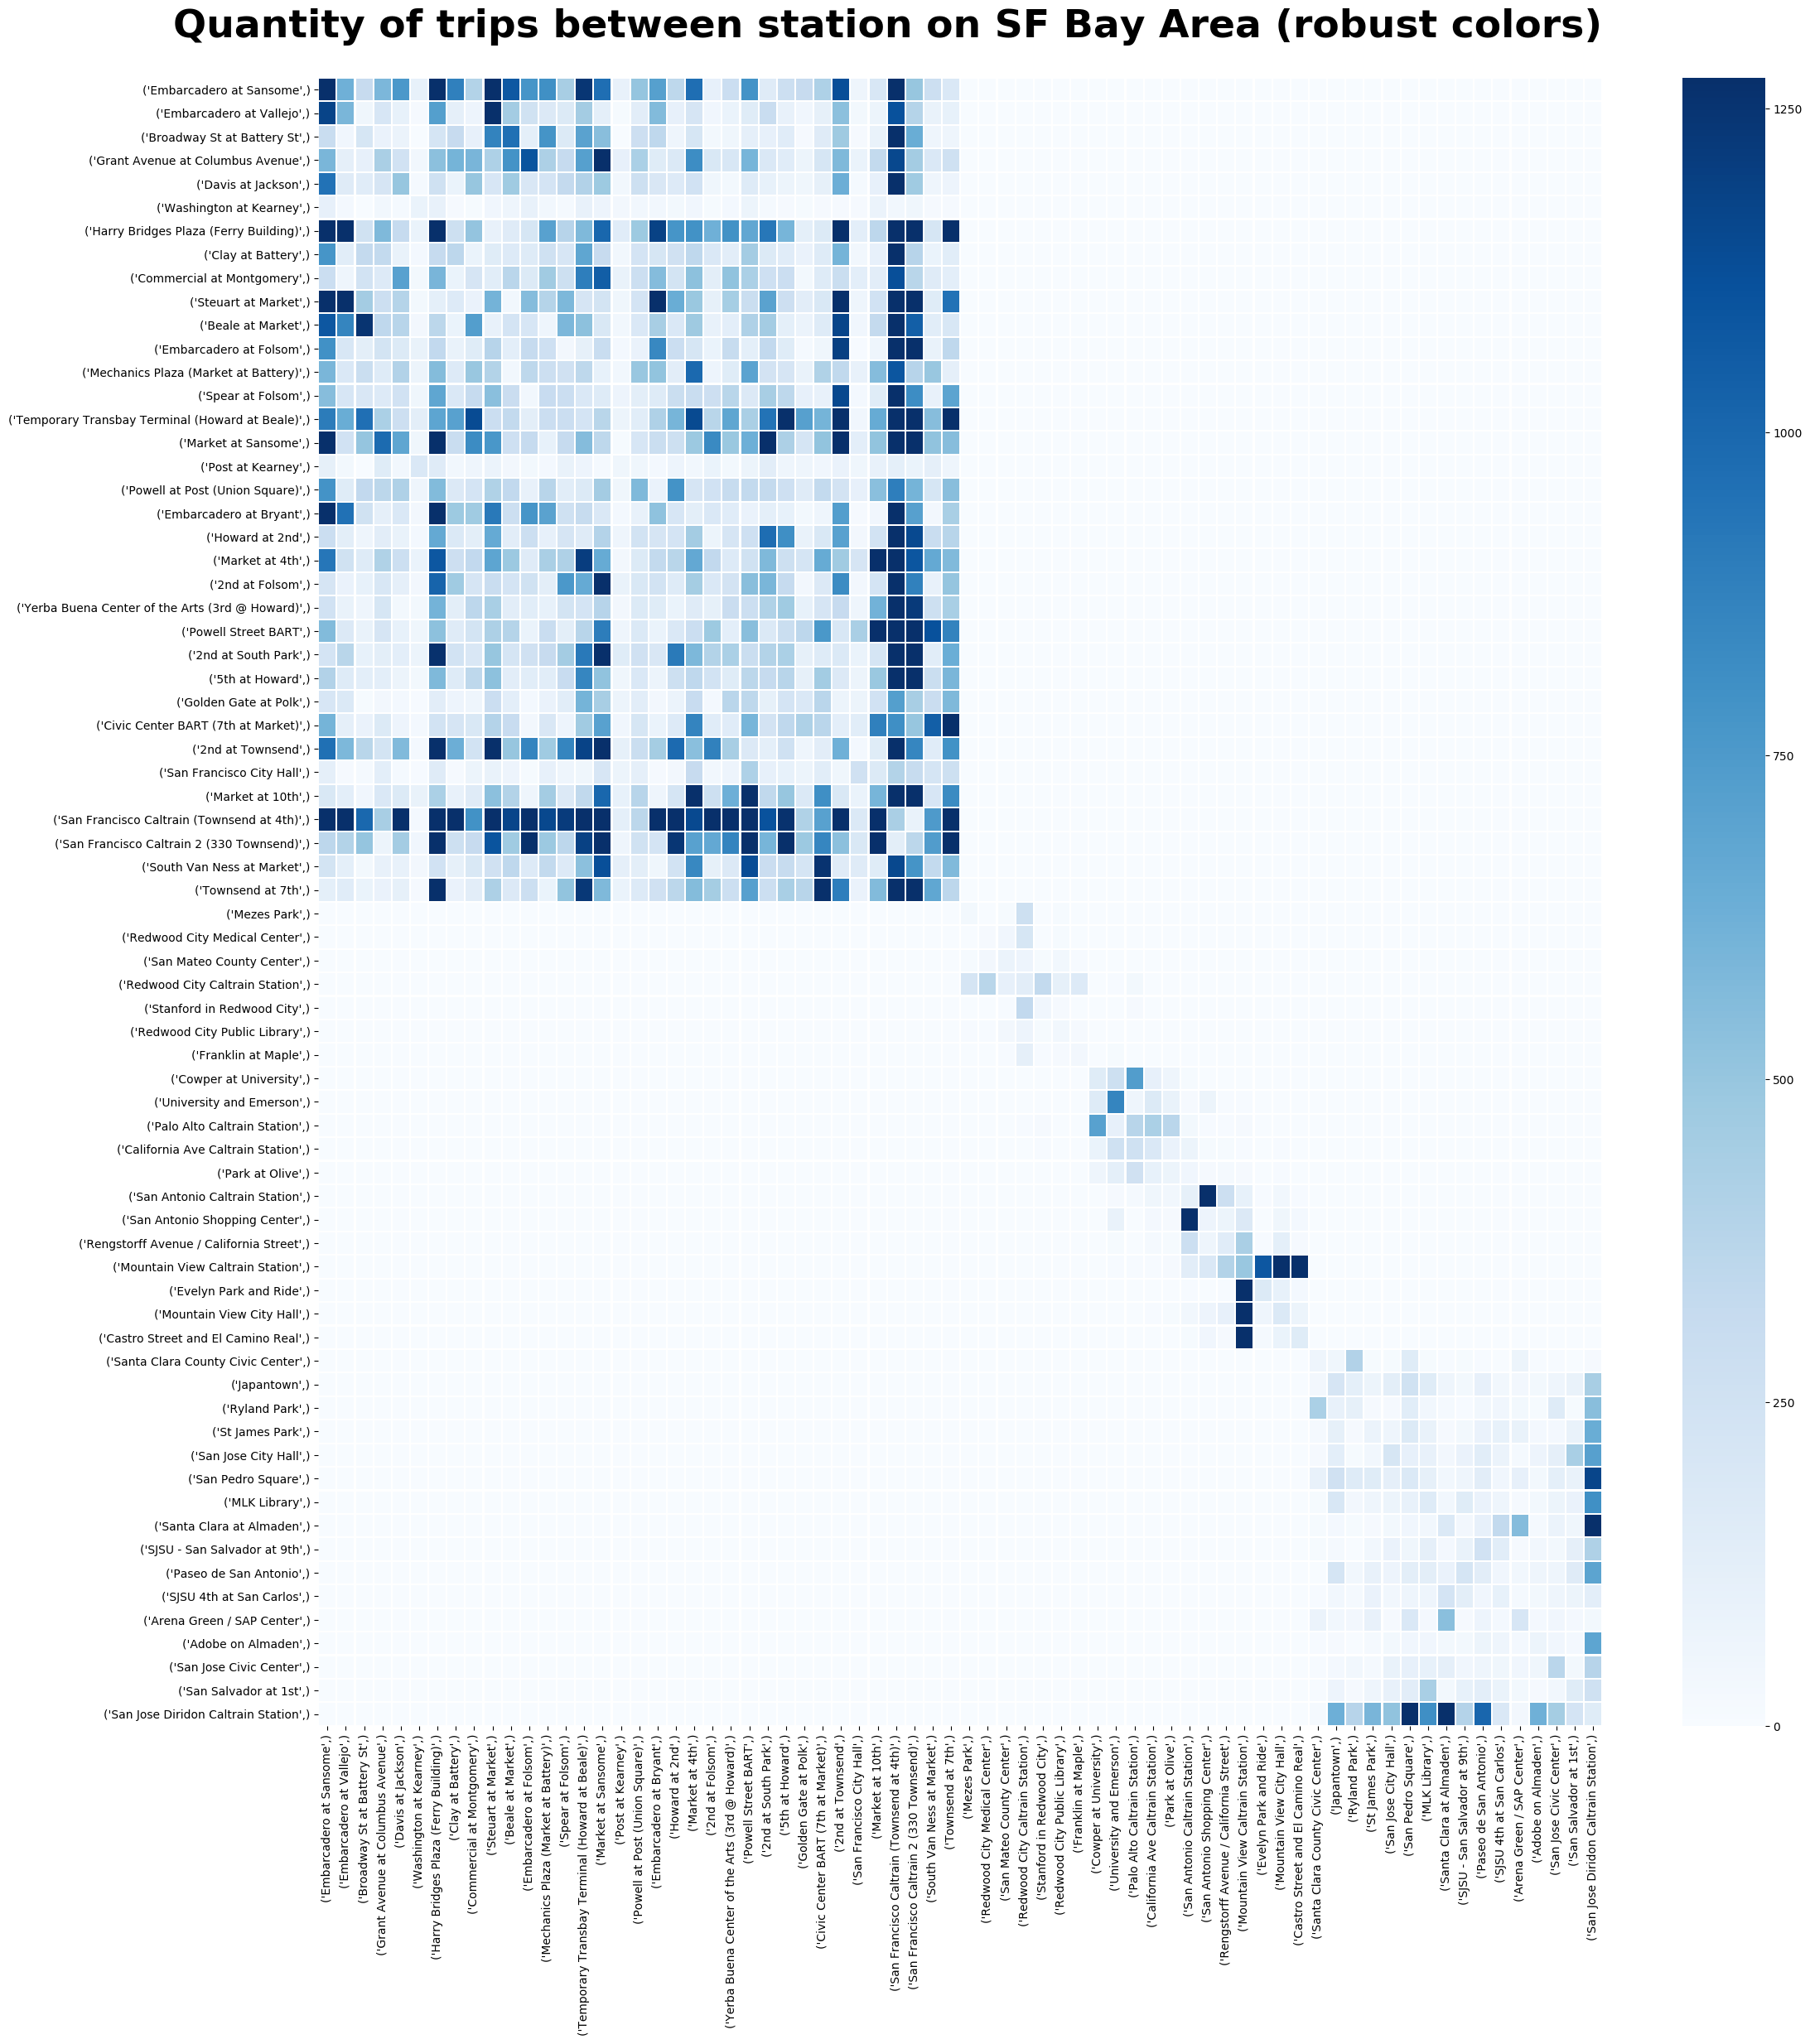

In [137]:
# get the tick label font size
fontsize_pt = 10 #plt.rcParams['ytick.labelsize']
dpi = 72.27

# comput the matrix height in points and inches
matrix_height_pt = fontsize_pt * 70
matrix_height_in = matrix_height_pt / dpi

# compute the required figure height 
top_margin = 0.04  # in percentage of the figure height
bottom_margin = 0.04 # in percentage of the figure height
figure_height = matrix_height_in / (1 - top_margin - bottom_margin)


# build the figure instance with the desired height
fig, ax = plt.subplots(
        figsize=(25,figure_height), 
        gridspec_kw=dict(top=2,wspace = 12))


fig.suptitle('Quantity of trips between station on SF Bay Area (robust colors)', fontsize=34, fontweight='bold',x= 0.4,y=2.08)
# let seaborn do it's thing
ax = sns.heatmap(matrix,cmap='Blues', robust= True, linewidths=.8, ax=ax, xticklabels=True)

Se puede ver perfectamente que mientras mas al notre y mas al oeste, mas se viaja entre si. Mientras que al sur este la frecuencia de muchos viajes entre estaciones es mas bien aislada, siendo mucho menor la frecuencia de viajes en esta zona

## Cantidad de viajes por sectores

### Sector noroeste

In [138]:
matrix_nor_west = matrix.iloc[:35,:36]

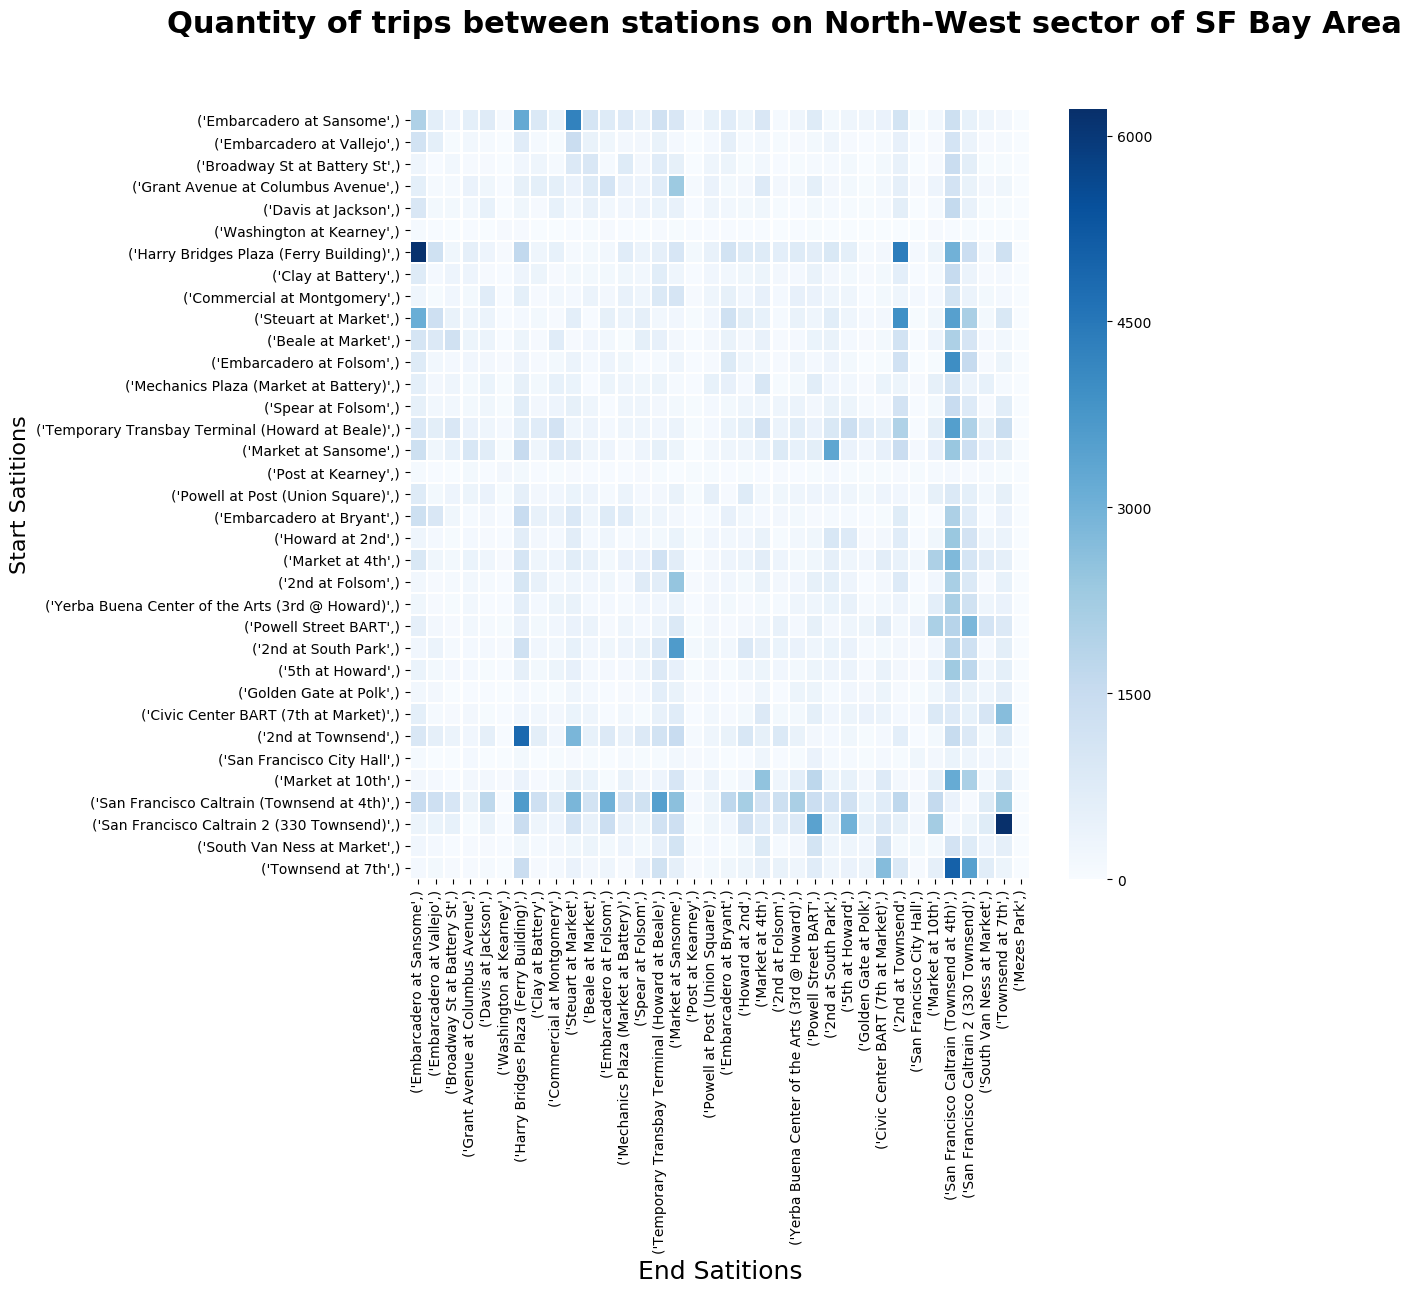

In [140]:
# Se analiza el resultado con la diferencia real de viajes entre las estaciones
fig, ax = plt.subplots(figsize=(10,10));  
sns.heatmap(matrix_nor_west,cmap='Blues' , linewidths=.8, ax=ax)
fig.suptitle('Quantity of trips between stations on North-West sector of SF Bay Area', fontsize=22, fontweight='bold')
plt.xlabel('End Stations', fontsize=18)
plt.ylabel('Start Stations', fontsize=16);

Si bien la diferencia entre los distintos valores de las estaciones es muy grande, se ve claramente que hay una gran
cantidad de viajes en todo este sector de Fc Bay Area

In [141]:
description = matrix_nor_west.describe()
description

,"(Embarcadero at Sansome,)","(Embarcadero at Vallejo,)","(Broadway St at Battery St,)","(Grant Avenue at Columbus Avenue,)","(Davis at Jackson,)","(Washington at Kearney,)","(Harry Bridges Plaza (Ferry Building),)","(Clay at Battery,)","(Commercial at Montgomery,)","(Steuart at Market,)",...,"(Golden Gate at Polk,)","(Civic Center BART (7th at Market),)","(2nd at Townsend,)","(San Francisco City Hall,)","(Market at 10th,)","(San Francisco Caltrain (Townsend at 4th),)","(San Francisco Caltrain 2 (330 Townsend),)","(South Van Ness at Market,)","(Townsend at 7th,)","(Mezes Park,)"
count,35.00,35.00,35.00,35.00,35.00,35.00,35.00,35.00,35.00,35.00,...,35.00,35.00,35.00,35.00,35.00,35.00,35.00,35.00,35.00,35.00
mean,859.26,344.80,254.26,249.80,286.89,50.46,926.23,273.03,313.26,699.83,...,166.14,398.71,802.03,92.71,491.51,1776.60,983.06,309.77,746.94,0.03
std,1111.65,374.17,292.42,190.54,322.40,38.34,1045.90,271.93,257.41,894.95,...,159.82,490.30,962.59,85.08,589.03,1151.54,789.12,282.48,1116.11,0.17
min,108.00,15.00,3.00,39.00,22.00,1.00,95.00,16.00,12.00,48.00,...,14.00,18.00,16.00,9.00,47.00,40.00,51.00,16.00,18.00,0.00
25%,238.00,121.00,71.50,130.00,90.50,27.00,291.00,95.00,136.50,271.50,...,56.50,148.50,198.00,35.50,144.00,1099.50,414.00,108.00,194.50,0.00
50%,589.00,175.00,149.00,202.00,172.00,37.00,576.00,175.00,225.00,421.00,...,107.00,193.00,534.00,71.00,246.00,1575.00,784.00,210.00,507.00,0.00
75%,952.50,489.00,321.00,338.50,393.00,72.00,1174.50,307.50,432.50,673.00,...,222.50,488.00,1008.50,129.00,561.00,2352.00,1293.00,413.50,745.00,0.00
max,6162.00,1290.00,1253.00,984.00,1700.00,186.00,4838.00,1294.00,1142.00,4269.00,...,716.00,2696.00,4357.00,431.00,2229.00,5041.00,3487.00,1113.00,6213.00,1.00


In [142]:
# Cantidad de viajes a cada estacion
matrix_nor_west.sum().sort_values(ascending=False)

(San Francisco Caltrain (Townsend at 4th),)         62181
(San Francisco Caltrain 2 (330 Townsend),)          34407
(Harry Bridges Plaza (Ferry Building),)             32418
(Embarcadero at Sansome,)                           30074
(2nd at Townsend,)                                  28071
(Market at Sansome,)                                27629
(Townsend at 7th,)                                  26143
(Steuart at Market,)                                24494
(Temporary Transbay Terminal (Howard at Beale),)    22000
(Market at 4th,)                                    19460
(Powell Street BART,)                               19193
(Market at 10th,)                                   17203
(2nd at South Park,)                                15936
(5th at Howard,)                                    14549
(Civic Center BART (7th at Market),)                13955
(Howard at 2nd,)                                    13365
(Embarcadero at Folsom,)                            13121
(Embarcadero a

In [143]:
matrix_nor_west.shape

(35, 36)

In [144]:
# Donde la media de los viajes en el sector es de: 
all_trips = 0
counter = 0
for x in range(0, 35):
    for y in range(0, 36):
        all_trips = all_trips + matrix_nor_west.iloc[x,y]
        counter += 1
print("Sum of all trips in the region: ",all_trips)
print("Mean of trips in the region: ",all_trips/counter)

Sum of all trips in the region:  575342
Mean of trips in the region:  456.620634921


In [147]:
# Y las estaciones del sector a las que mas se viaja son:
# 1) San Francisco Caltrain (Townsend at 4th) con un promedio de 1781 viajes
# 2) San Francisco Caltrain 2 (330 Townsend) con un promedio de 987 viajes
# 3) Harry Bridges Plaza (Ferry Building) con un promedio de 932 viajes
# A continuacion se muestra cuanto se viaja en promedio a cada estacion
matrix_nor_west.mean()

(Embarcadero at Sansome,)                           859.26
(Embarcadero at Vallejo,)                           344.80
(Broadway St at Battery St,)                        254.26
(Grant Avenue at Columbus Avenue,)                  249.80
(Davis at Jackson,)                                 286.89
(Washington at Kearney,)                             50.46
(Harry Bridges Plaza (Ferry Building),)             926.23
(Clay at Battery,)                                  273.03
(Commercial at Montgomery,)                         313.26
(Steuart at Market,)                                699.83
(Beale at Market,)                                  336.17
(Embarcadero at Folsom,)                            374.89
(Mechanics Plaza (Market at Battery),)              330.74
(Spear at Folsom,)                                  320.74
(Temporary Transbay Terminal (Howard at Beale),)    628.57
(Market at Sansome,)                                789.40
(Post at Kearney,)                                   65.

### Sector Sureste

In [148]:
matrix_south_east = matrix.ix[54:,54:]

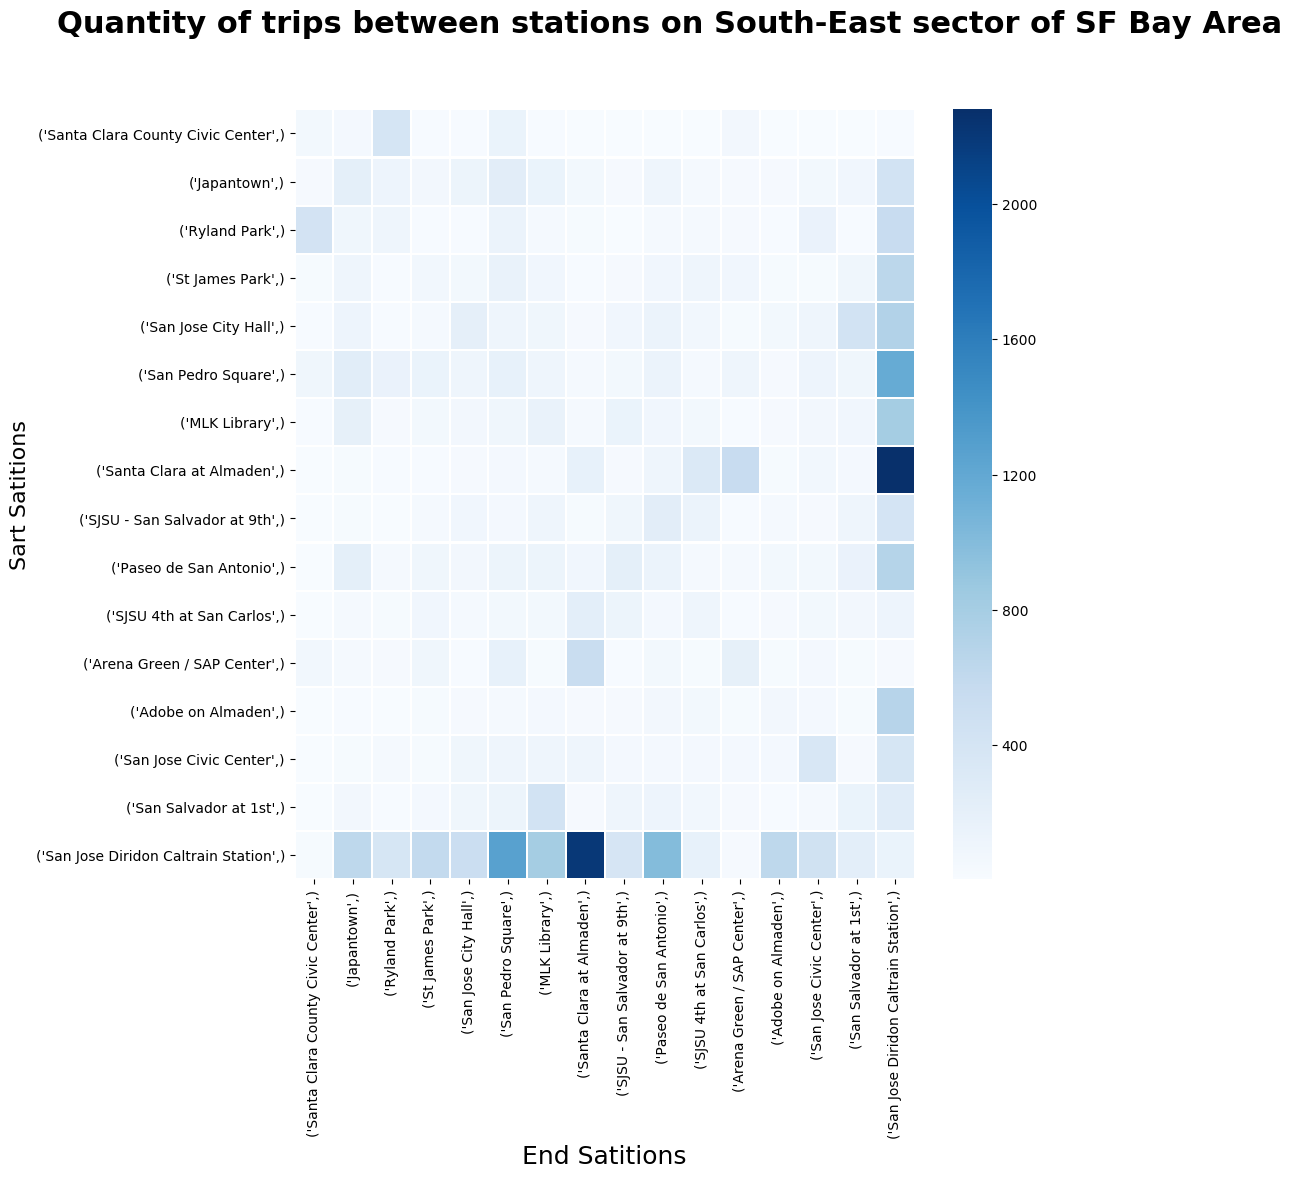

In [150]:
# se realiza un analisis con los datos reales de la matriz
fig, ax = plt.subplots(figsize=(10,10));  
sns.heatmap(matrix_south_east,cmap='Blues' , linewidths=.8, ax=ax)
fig.suptitle('Quantity of trips between stations on South-East sector of SF Bay Area', fontsize=22, fontweight='bold')
plt.xlabel('End Stations', fontsize=18)
plt.ylabel('Sart Stations', fontsize=16);

In [151]:
matrix_south_east.describe()

,"(Santa Clara County Civic Center,)","(Japantown,)","(Ryland Park,)","(St James Park,)","(San Jose City Hall,)","(San Pedro Square,)","(MLK Library,)","(Santa Clara at Almaden,)","(SJSU - San Salvador at 9th,)","(Paseo de San Antonio,)","(SJSU 4th at San Carlos,)","(Arena Green / SAP Center,)","(Adobe on Almaden,)","(San Jose Civic Center,)","(San Salvador at 1st,)","(San Jose Diridon Caltrain Station,)"
count,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00,16.00
mean,51.88,135.12,89.00,91.88,100.50,196.31,152.56,230.06,90.75,154.38,87.94,84.50,71.88,109.44,104.75,585.00
std,103.86,154.96,126.12,139.63,122.87,293.13,200.21,542.03,99.28,233.95,78.51,133.81,148.99,123.45,106.60,549.88
min,3.00,17.00,3.00,12.00,12.00,45.00,13.00,8.00,5.00,5.00,4.00,17.00,7.00,9.00,3.00,17.00
25%,9.00,38.75,16.25,22.75,32.75,87.25,47.00,29.75,33.25,62.50,46.75,27.00,24.75,46.75,29.75,233.75
50%,15.50,84.00,37.00,58.00,68.00,134.00,100.00,41.50,54.50,96.50,59.50,35.00,31.50,60.50,88.00,492.00
75%,42.25,205.00,114.00,90.75,103.50,173.75,136.75,134.50,110.75,138.25,101.50,75.00,53.75,119.00,127.00,698.50
max,427.00,632.00,399.00,595.00,518.00,1274.00,808.00,2200.00,392.00,1007.00,330.00,553.00,626.00,448.00,435.00,2280.00


In [152]:
matrix_south_east.shape

(16, 16)

In [153]:
# Donde la media del sector es:
all_trips = 0
counter = 0
for x in range(0, 16):
    for y in range(0, 16):
        all_trips = all_trips + matrix_south_east.iloc[x,y]
        counter += 1
print("Sum of all trips in the region: ",all_trips)
print("Mean of trips in the region: ",all_trips/counter)

Sum of all trips in the region:  37375
Mean of trips in the region:  145.99609375


### Sector Centro

In [154]:
matrix_center = matrix.ix[35:54,36:54]

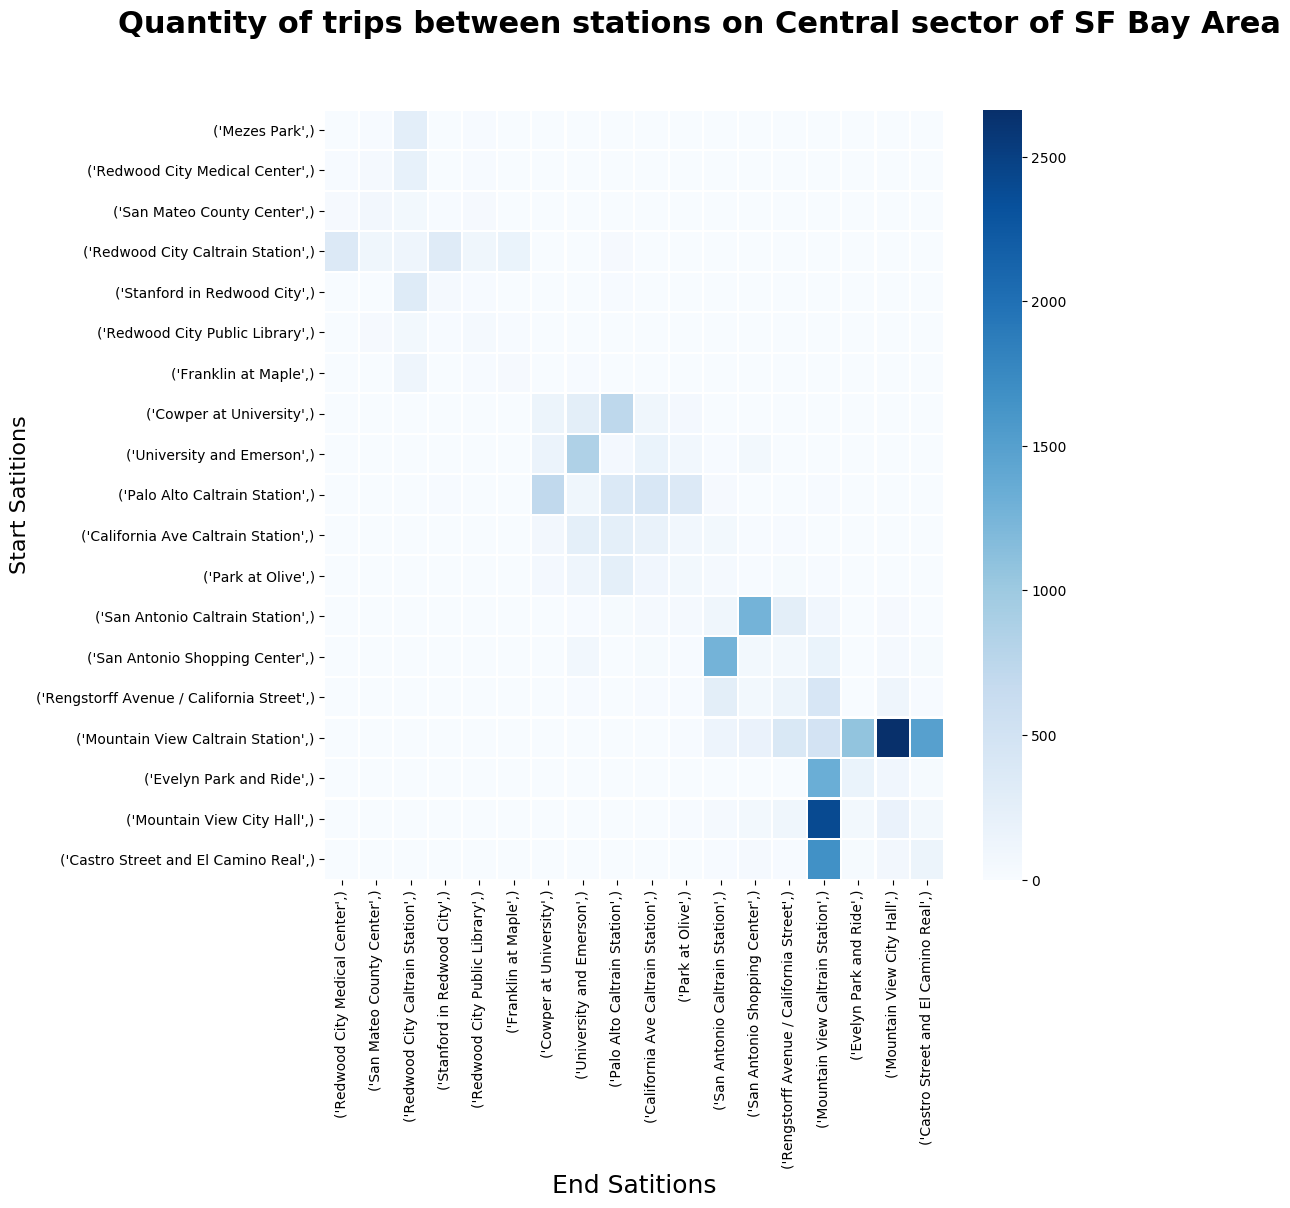

In [156]:
# Analisis con los datos reales de los viajes
fig, ax = plt.subplots(figsize=(10,10));  
sns.heatmap(matrix_center,cmap='Blues' , linewidths=.8, ax=ax)
fig.suptitle('Quantity of trips between stations on Central sector of SF Bay Area', fontsize=22, fontweight='bold')
plt.xlabel('End Stations', fontsize=18)
plt.ylabel('Start Stations', fontsize=16);

In [157]:
matrix_center.describe()

,"(Redwood City Medical Center,)","(San Mateo County Center,)","(Redwood City Caltrain Station,)","(Stanford in Redwood City,)","(Redwood City Public Library,)","(Franklin at Maple,)","(Cowper at University,)","(University and Emerson,)","(Palo Alto Caltrain Station,)","(California Ave Caltrain Station,)","(Park at Olive,)","(San Antonio Caltrain Station,)","(San Antonio Shopping Center,)","(Rengstorff Avenue / California Street,)","(Mountain View Caltrain Station,)","(Evelyn Park and Ride,)","(Mountain View City Hall,)","(Castro Street and El Camino Real,)"
count,19.00,19.00,19.00,19.00,19.00,19.00,19.00,19.00,19.00,19.00,19.00,19.00,19.00,19.00,19.00,19.00,19.00,19.00
mean,23.11,15.53,63.84,22.74,13.58,12.53,62.42,93.37,93.68,57.95,40.89,107.74,95.47,56.32,350.58,71.53,171.32,94.26
std,84.51,30.38,103.77,75.26,26.80,38.34,164.81,204.10,190.54,106.95,84.58,291.41,288.44,108.93,685.61,247.63,605.68,339.75
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.50,0.50,0.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,1.00,1.00,1.00,1.00,2.00,8.00,4.00,6.00,11.00,12.00,8.00,6.00,9.00,1.00,1.00,0.00
75%,3.50,10.00,92.00,8.50,14.50,3.50,32.00,99.50,47.50,75.00,49.00,58.50,64.00,47.00,302.50,6.00,65.00,21.00
max,370.00,108.00,337.00,330.00,110.00,167.00,709.00,859.00,736.00,424.00,366.00,1276.00,1271.00,396.00,2396.00,1080.00,2663.00,1489.00


In [158]:
matrix_center.shape

(19, 18)

In [159]:
# Donde la media del sector es:
all_trips = 0
counter = 0
for x in range(0, 19):
    for y in range(0, 18):
        all_trips = all_trips + matrix_center.iloc[x,y]
        counter += 1
print("Sum of all trips in the region: ",all_trips)
print("Mean of trips in the region: ",all_trips/counter)

Sum of all trips in the region:  27490
Mean of trips in the region:  80.3801169591


## Como influye el clima en la cantidad y duracion de los viajes?

In [136]:
trips['date'] = trips['start_date'].apply(lambda x: x.date())
trips.date = pd.to_datetime(trips.date)

In [137]:
trip = trips.groupby(['date', 'zip_code']).agg(['mean', 'sum','count'])
trip['mean_duration_sec'] = trip['duration']['mean']
trip['trip_count'] = trip['duration']['count']
trip = trip.loc[:,['mean_duration_sec', 'trip_count']]
trip = trip.reset_index()
trip['zip_code'] = trip['zip_code'].apply(lambda x: int(x))
trip.columns = trip.columns.droplevel(1)
trip

ValueError: invalid literal for int() with base 10: '94103-2585'

In [41]:
def is_int(x):
    try:
        int(x)
    except:
        return False
    return True

trip = trip[trip['zip_code'].apply(lambda x: True if is_int(x) else False)]

In [42]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

weather = weather[weather['precipitation_inches'].apply(lambda x: True if is_float(x) else False)]
weather['precipitation_inches'] = weather['precipitation_inches'].apply(lambda x: float(x))

In [43]:
weather['Fog'] = weather['events'].apply(lambda x: x == 'Fog' or x == 'Fog-Rain')
weather['Rain'] = weather['events'].apply(lambda x: x == 'Rain' or x == 'Fog-Rain' or x == 'Rain-Thunderstorm')
weather['Thunderstorm'] = weather['events'].apply(lambda x: x == 'Rain-Thunderstorm')
weather = weather.drop('events', 1)
weather

,date,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,...,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,wind_dir_degrees,zip_code,Fog,Rain,Thunderstorm
0,2013-08-29,74.00,68.00,61.00,61.00,58.00,56.00,93.00,75.00,57.00,...,23.00,11.00,28.00,0.00,4.00,286.00,94107,False,False,False
1,2013-08-30,78.00,69.00,60.00,61.00,58.00,56.00,90.00,70.00,50.00,...,29.00,13.00,35.00,0.00,2.00,291.00,94107,False,False,False
2,2013-08-31,71.00,64.00,57.00,57.00,56.00,54.00,93.00,75.00,57.00,...,26.00,15.00,31.00,0.00,4.00,284.00,94107,False,False,False
3,2013-09-01,74.00,66.00,58.00,60.00,56.00,53.00,87.00,68.00,49.00,...,25.00,13.00,29.00,0.00,4.00,284.00,94107,False,False,False
4,2013-09-02,75.00,69.00,62.00,61.00,60.00,58.00,93.00,77.00,61.00,...,23.00,12.00,30.00,0.00,6.00,277.00,94107,False,False,False
5,2013-09-03,73.00,67.00,60.00,59.00,56.00,51.00,84.00,65.00,46.00,...,24.00,15.00,31.00,0.00,2.00,276.00,94107,False,False,False
6,2013-09-04,74.00,68.00,61.00,59.00,57.00,56.00,90.00,72.00,53.00,...,29.00,19.00,35.00,0.00,4.00,269.00,94107,False,False,False
7,2013-09-05,72.00,66.00,60.00,57.00,56.00,54.00,90.00,74.00,57.00,...,31.00,21.00,37.00,0.00,3.00,270.00,94107,False,False,False
8,2013-09-06,85.00,71.00,56.00,57.00,51.00,45.00,86.00,58.00,29.00,...,24.00,8.00,28.00,0.00,0.00,287.00,94107,False,False,False
9,2013-09-07,88.00,73.00,58.00,64.00,54.00,46.00,86.00,59.00,31.00,...,21.00,8.00,25.00,0.00,1.00,305.00,94107,False,False,False


In [135]:
trips_and_weather = pd.merge(weather, trip, how='inner', on=['date','zip_code'])

NameError: name 'trip' is not defined

In [70]:
trips_and_weather.shape

(3137, 28)

In [58]:
weather_corr = trips_and_weather.corr().abs().loc[:,['mean_duration_sec', 'trip_count']]

In [60]:
weather_corr = weather_corr[weather_corr.index != 'mean_duration_sec']
weather_corr = weather_corr[weather_corr.index != 'trip_count']
weather_corr = weather_corr[weather_corr.index != 'zip_code']

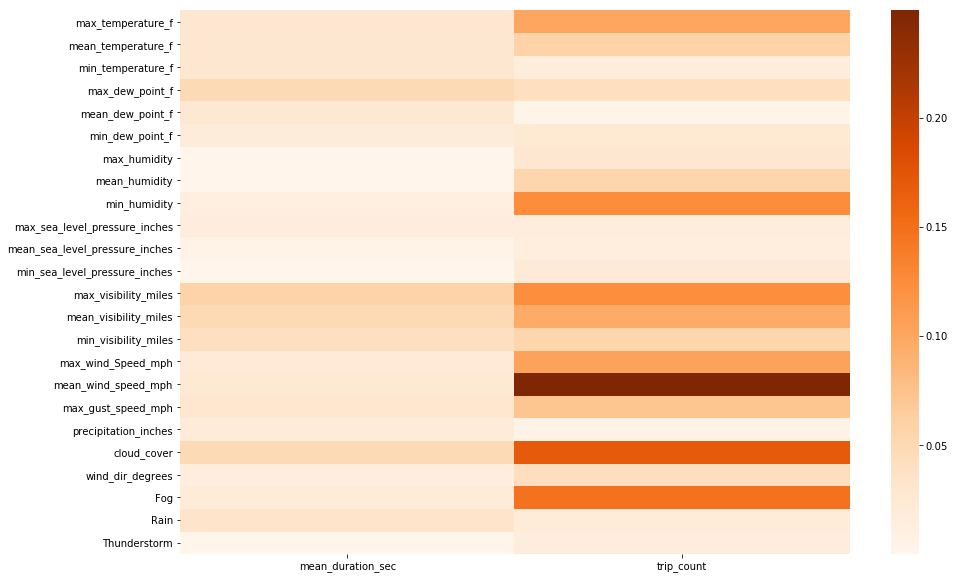

In [61]:
plt.rcParams['figure.figsize'] = (15, 10)
sns.heatmap(weather_corr,cmap='Oranges');

In [62]:
weather_corr.sort_values(by='trip_count', ascending=False)

,mean_duration_sec,trip_count
mean_wind_speed_mph,0.03,0.25
cloud_cover,0.05,0.17
Fog,0.02,0.15
min_humidity,0.01,0.12
max_visibility_miles,0.06,0.12
max_wind_Speed_mph,0.02,0.10
max_temperature_f,0.03,0.10
mean_visibility_miles,0.05,0.10
max_gust_speed_mph,0.03,0.07
mean_temperature_f,0.03,0.06


Pareciera que el clima no afecta fuertemente la duración de los viajes, pero sí su cantidad. El órden por relevancia sería:
    
Si hay mucho viento:

In [134]:
a = trips_and_weather.loc[:,['mean_wind_speed_mph', 'trip_count']]
a = a.groupby(['mean_wind_speed_mph']).agg(['mean'])
a = a.reset_index()
a.columns = a.columns.droplevel(1)
a.plot(x='mean_wind_speed_mph', y='trip_count').set_ylim(0)

fig, ax = plt.subplots(figsize=(17, 7))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.title('Cantidad de viajes vs. Velocidad del viento')
plt.xlabel('Media de velocidad del viento (mph)')
plt.ylabel('Cantidad de viajes');

NameError: name 'trips_and_weather' is not defined

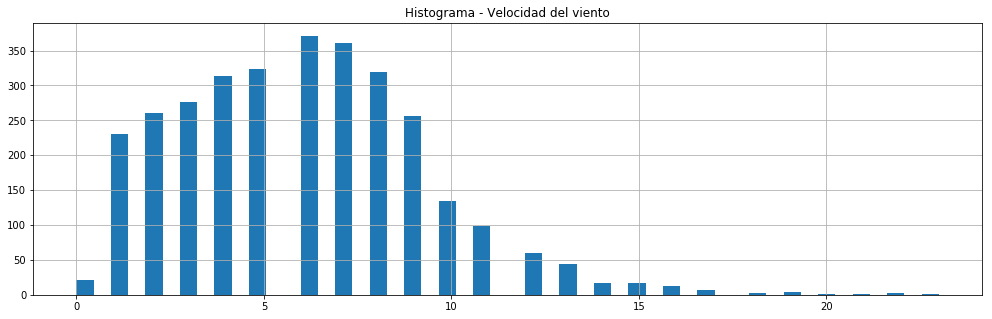

In [83]:
trips_and_weather['mean_wind_speed_mph'].hist(bins=50,figsize=(17,5)); # TODO: deal with the speed > 9 noise

plt.title('Histograma - Velocidad del viento');

Si está muy nublado:    

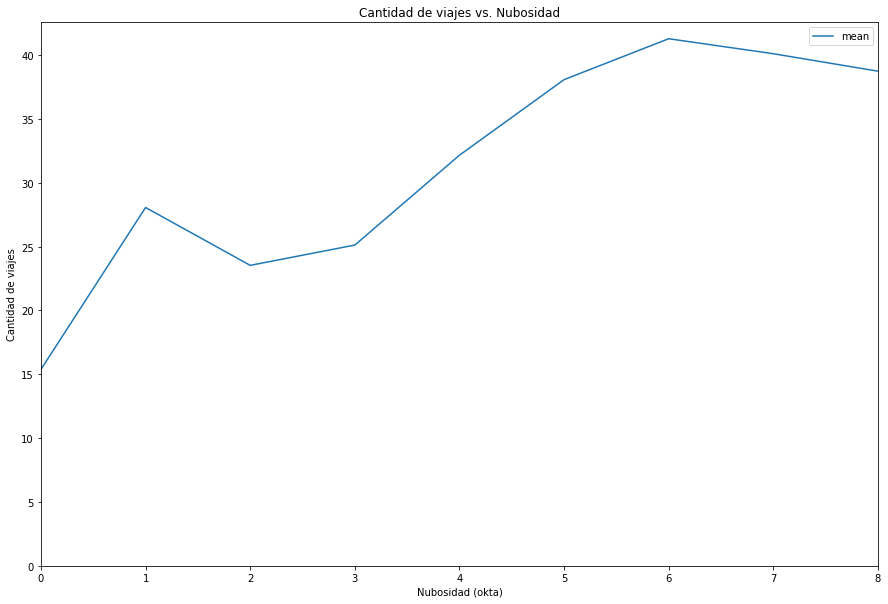

In [78]:
trips_and_weather.groupby(['cloud_cover']).agg(['mean']).reset_index().plot('cloud_cover','trip_count').set_ylim(0);

plt.title('Cantidad de viajes vs. Nubosidad')
plt.xlabel('Nubosidad (okta)')
plt.ylabel('Cantidad de viajes');

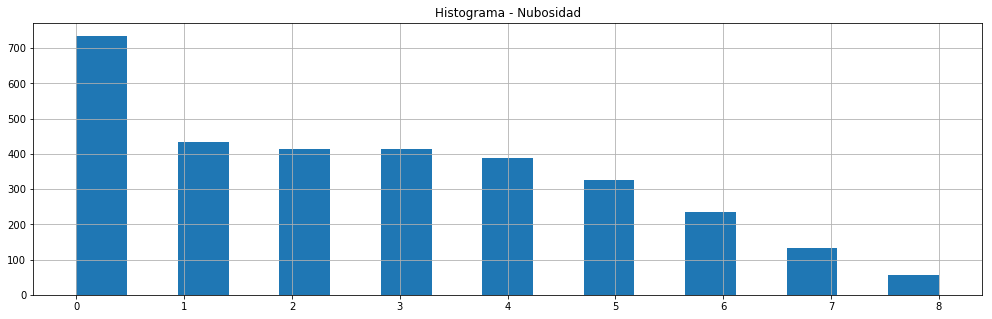

In [81]:
trips_and_weather['cloud_cover'].hist(bins=17,figsize=(17,5));

plt.title('Histograma - Nubosidad');

En días muy nublados (cloud_cover > 5) hay una relativa disparidad en cantidad de registros, por lo que el aparente gusto de los ciclistas por los días nublados puede no ser tan marcado como parece. Sin embargo, aún considerando los días menos nublados se puede ver dicha tendencia.

El mínimo de humedad:

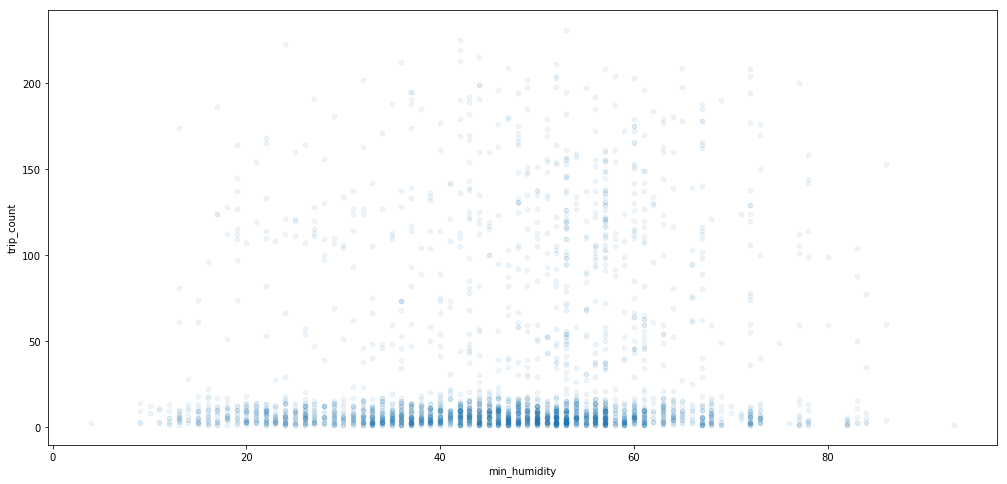

In [84]:
trips_and_weather.plot.scatter('min_humidity','trip_count',alpha=0.07,figsize=(17,8));

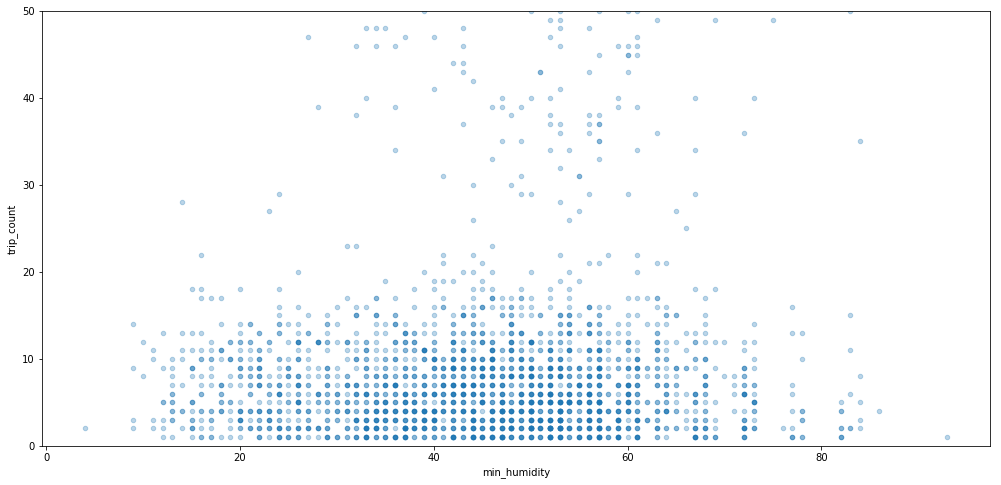

In [85]:
trips_and_weather.plot.scatter('min_humidity','trip_count',alpha=0.3,figsize=(17,8), ylim=(0,50));

Número de viajes promedio en un día con lluvia, niebla y tormenta eléctrica, vs un día promedio, vs un día promedio sin eventos climáticos:

In [86]:
average_trip_count = trips_and_weather.describe().iloc[1]['trip_count']
fog = trips_and_weather[trips_and_weather['Fog'] == True]
average_trip_count_fog = fog.describe().iloc[1]['trip_count']
rain = trips_and_weather[trips_and_weather['Rain'] == True]
average_trip_count_rain = rain.describe().iloc[1]['trip_count']
thunderstorm = trips_and_weather[trips_and_weather['Thunderstorm'] == True]
average_trip_count_thunderstorm = thunderstorm.describe().iloc[1]['trip_count']
no_events = trips_and_weather[trips_and_weather['Fog'] == False]
no_events = no_events[no_events['Rain'] == False]
no_events = no_events[no_events['Thunderstorm'] == False]
average_trip_count_no_events = no_events.describe().iloc[1]['trip_count']

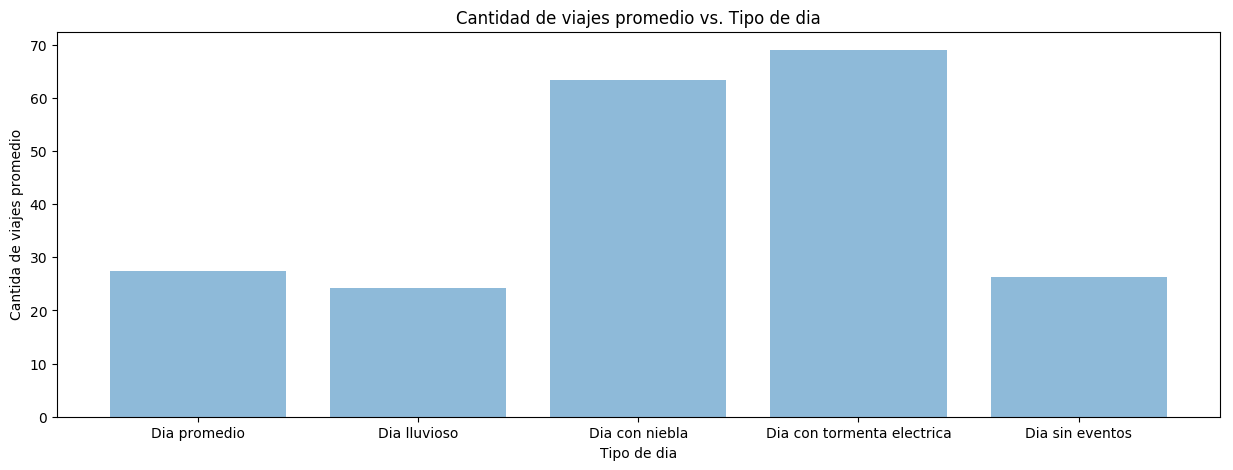

In [95]:
objects = (
    'Dia promedio',
    'Dia lluvioso',
    'Dia con niebla',
    'Dia con tormenta electrica',
    'Dia sin eventos'
)
y_pos = np.arange(len(objects))
performance = [
    average_trip_count,
    average_trip_count_rain,
    average_trip_count_fog,
    average_trip_count_thunderstorm,
    average_trip_count_no_events
]
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.title('Cantidad de viajes promedio vs. Tipo de dia')
plt.ylabel('Cantida de viajes promedio')
plt.xlabel('Tipo de dia')
plt.show()

Por que los días de tormenta eléctrica sean tan populares?

In [93]:
thunderstorm.shape[0]

1

Solo existe un registro. Esta es la razon del elevado promedio de cantidad de viajes observado en el grafico anterior.
Se verifica que haya "suficientes" días para las demás condiciones climáticas

In [96]:
print('Todos', trips_and_weather.shape[0])
print('Lluvia', rain.shape[0])
print('Niebla', fog.shape[0])
print('Sin eventos', no_events.shape[0])

Todos 3137
Lluvia 297
Niebla 111
Sin eventos 2739


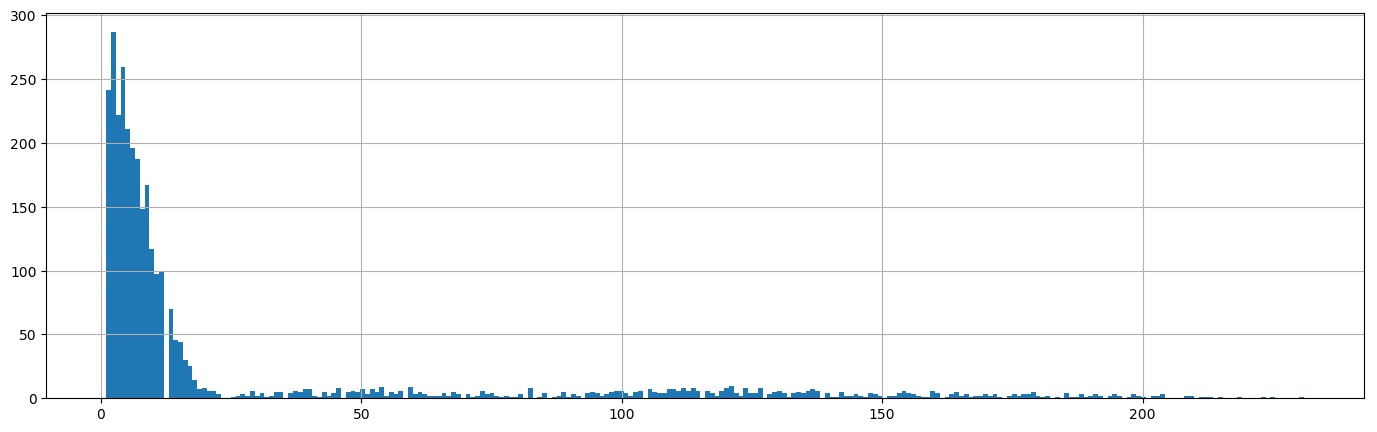

In [97]:
trips_and_weather['trip_count'].hist(bins=250,figsize=(17,5));

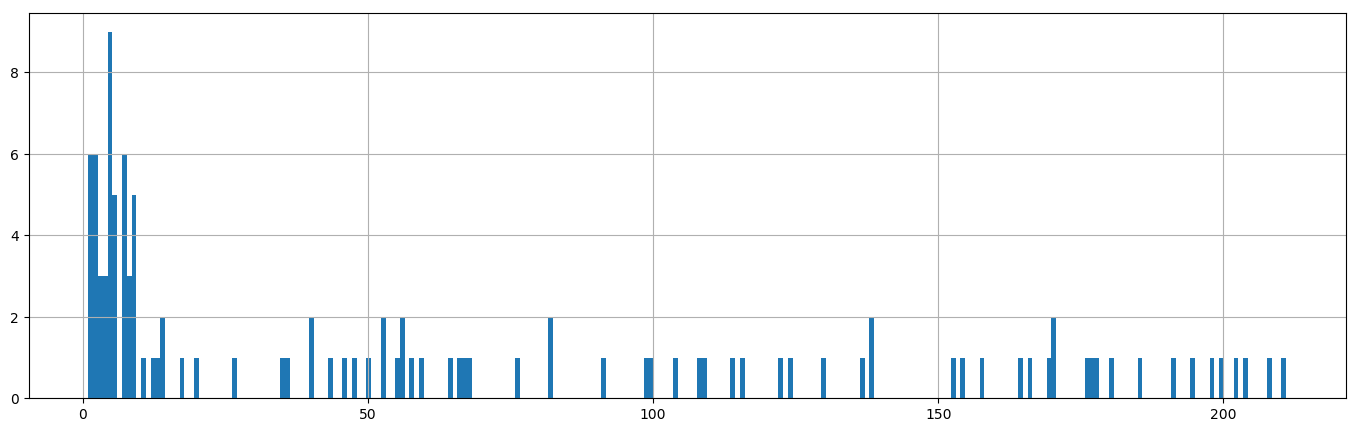

In [98]:
fog['trip_count'].hist(bins=250,figsize=(17,5));

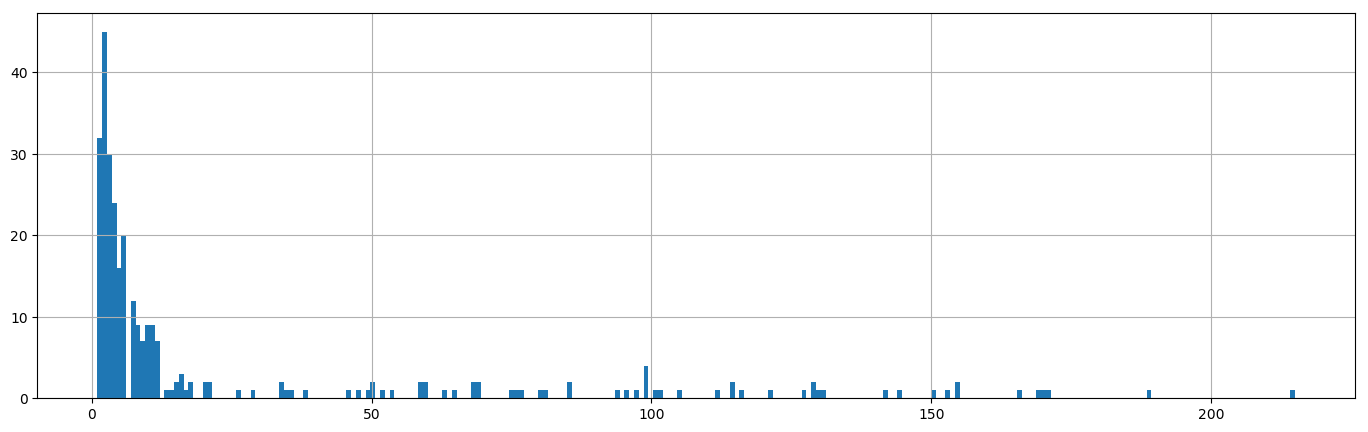

In [99]:
rain['trip_count'].hist(bins=250,figsize=(17,5));

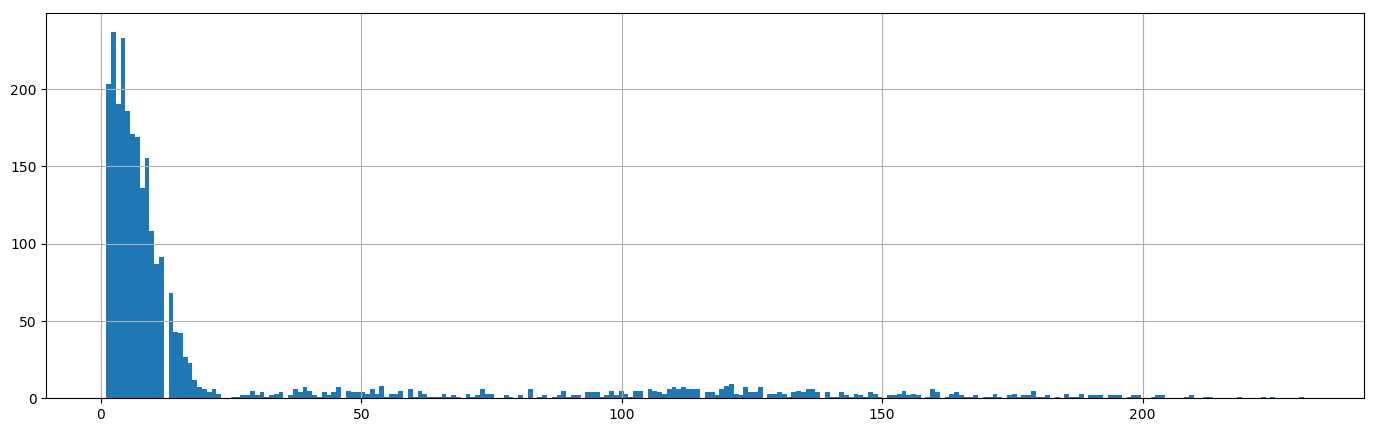

In [100]:
no_events['trip_count'].hist(bins=250,figsize=(17,5));

La elevada cantidad promedio de viajes con niebla también pareciera deberse a falta de datos, dado que por ejemplo la única ocasión de un zip code nublado con 220 viajes se ve sobrerrepresentada.         
Esto sucede también parcialmente con los días lluviosos, si bien en mucho menor medida.          
Además, parecieran ser muy comunes los casos en que una región (con igual zip code) tiene pocos viajes en el día. 